## **Loading and Viewing the data**

In [7]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head(5)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [8]:
df.shape

(7920, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [10]:
df.head(5)['tweet']

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

# **Preprocessing the dataset**

## Identifying and Eliminating URLs

### Detecting URLs Within Tweets

In [12]:
import pandas as pd
import re

def contains_url(tweet):
    # Check if the tweet contains any URLs
    return bool(re.search(r'http\S+|www\S+|https\S+', tweet))

# Apply the function to check for URLs in 'cleaned_tweet'
df['contains_url'] = df['tweet'].apply(contains_url)

# Filter and display only those rows where 'contains_url' is True
tweets_with_urls = df[df['contains_url']]
df

,id,label,tweet,contains_url
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,True
1,2,0,Finally a transparant silicon case ^^ Thanks t...,True
2,3,0,We love this! Would you go? #talk #makememorie...,True
3,4,0,I'm wired I know I'm George I was made that wa...,True
4,5,1,What amazing service! Apple won't even talk to...,False
...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...,True
7916,7917,0,We would like to wish you an amazing day! Make...,False
7917,7918,0,Helping my lovely 90 year old neighbor with he...,False
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...,True


### Purging URLs from Tweets
URLs are removed  from tweets in sentiment analysis because they do not convey emotions or opinions, often merely linking to external content.

In [13]:
def remove_urls(tweet):
    # Regular expression to identify URLs
    return re.sub(r'http\S+|www\S+|https\S+', '', tweet)


# Apply the function to remove URLs from 'cleaned_tweet'
df['cleaned_tweet'] = df['tweet'].apply(remove_urls)

# Display the DataFrame to verify URLs are removed
print(df['cleaned_tweet'])


0       #fingerprint #Pregnancy Test  #android #apps #...
1       Finally a transparant silicon case ^^ Thanks t...
2       We love this! Would you go? #talk #makememorie...
3       I'm wired I know I'm George I was made that wa...
4       What amazing service! Apple won't even talk to...
                              ...                        
7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day! Make...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona!!! #Apple #Store #BCN #Barcelo...
Name: cleaned_tweet, Length: 7920, dtype: object


In [14]:
import pandas as pd
import re

def contains_url(tweet):
    # Check if the tweet contains any URLs
    return bool(re.search(r'http\S+|www\S+|https\S+', tweet))

# Apply the function to check for URLs in 'cleaned_tweet'
df['contains_url_after_clean'] = df['cleaned_tweet'].apply(contains_url)

# Filter and display only those rows where 'contains_url' is True
tweets_with_urls = df[df['contains_url_after_clean']]
print(tweets_with_urls[['cleaned_tweet']])
df.head()

Empty DataFrame
Columns: [cleaned_tweet]
Index: []


,id,label,tweet,contains_url,cleaned_tweet,contains_url_after_clean
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,True,#fingerprint #Pregnancy Test #android #apps #...,False
1,2,0,Finally a transparant silicon case ^^ Thanks t...,True,Finally a transparant silicon case ^^ Thanks t...,False
2,3,0,We love this! Would you go? #talk #makememorie...,True,We love this! Would you go? #talk #makememorie...,False
3,4,0,I'm wired I know I'm George I was made that wa...,True,I'm wired I know I'm George I was made that wa...,False
4,5,1,What amazing service! Apple won't even talk to...,False,What amazing service! Apple won't even talk to...,False


**The above DataFrame columns 'cleaned_tweet', 'contains_url_after_clean' indicates that URLs have been successfully removed from the tweets.

# Examining Special Characters in Tweets

In [15]:
import pandas as pd
import re

# Function to find unique special characters in the 'tweet' column
def find_special_characters(df):
    special_chars = set()
    for tweet in df['cleaned_tweet']:
        # Find characters that are not alphanumeric or spaces
        chars = set(re.findall(r'[^a-zA-Z0-9\s]', tweet))
        special_chars.update(chars)
    return special_chars

# Get the unique special characters
special_characters = find_special_characters(df)

# Print the special characters found in the 'tweet' column
print("Special Characters in the 'tweet' column:", special_characters)

Special Characters in the 'tweet' column: {'。', '종', '\U000fe823', 'ン', '♪', '맛', '像', '神', '红', '\U000feb13', '랑', '島', '☆', '울', '𝓁', 'ç', '\U000fe814', 'α', '顔', 'à', '-', '𝓃', 'ı', '\U000fe803', 'Ⓢ', '飯', '«', '材', '\uf8ff', '”', '＋', '각', '[', ':', 'η', '慧', '녕', '机', '厳', '謝', 'ю', '램', 'リ', '°', '\ue04a', 'к', 'ά', 'ם', '社', '秋', 'ú', '%', '>', '님', ']', '༺', 'Ⓓ', 'ツ', 'タ', '笑', '英', 'н', 'Ⓛ', '！', '原', '食', 'ر', '“', '\U000fe354', '신', 'в', ',', 'の', 'У', '\U000fe517', '비', '╭', 'お', '™', '𝒹', 'Ⓥ', '"', 'í', '보', '𝒸', '行', 'ñ', '生', '원', 'ッ', ')', '타', '➊', '플', 'ي', '는', '小', '拍', '\ue106', 'て', '\ue32b', 'い', '\ue056', 'р', '하', 'ف', '城', 'é', '\U000fe968', 'ー', '그', '!', '\ue32a', '_', 'ト', '»', '\ue327', 'ל', '‘', '𝓊', '&', 'セ', '試', '박', '𝓌', '\u200b', 'Ⓞ', 'ﾉ', '𝓂', '☽', '𝑔', '}', '現', '$', '►', '\ue412', '.', '요', 'ゆ', 'ط', '\ue326', 'д', 'أ', 'س', '€', 'ר', '=', '✷', '\ue328', '—', '\ue329', 'Ⓘ', '–', '♡', 'ы', 'ノ', 'ل', 'ﬁ', 'Í', '장', '術', '語', '�', '순', '熟', '@', 'ة',

# Removing Punctuation Marks from Tweets

In [16]:
import string
ss = string.punctuation
ss

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punctuation(text):
    punctuation = string.punctuation
    filtered_characters = []  # List to hold characters that are not punctuation
    for ch in text:
        if ch not in set(punctuation):
            filtered_characters.append(ch)  # Add non-punctuation characters to the list
    return ''.join(filtered_characters)  # Join all characters into a single string without punctuation

# Apply to DataFrame
df['processed_tweet'] = df['cleaned_tweet'].apply(remove_punctuation)
# Display the DataFrame
df[['cleaned_tweet', 'processed_tweet']]

,cleaned_tweet,processed_tweet
0,#fingerprint #Pregnancy Test #android #apps #...,fingerprint Pregnancy Test android apps beaut...
1,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks to ...
2,We love this! Would you go? #talk #makememorie...,We love this Would you go talk makememories un...
3,I'm wired I know I'm George I was made that wa...,Im wired I know Im George I was made that way ...
4,What amazing service! Apple won't even talk to...,What amazing service Apple wont even talk to m...
...,...,...
7915,Live out loud #lol #liveoutloud #selfie #smile...,Live out loud lol liveoutloud selfie smile son...
7916,We would like to wish you an amazing day! Make...,We would like to wish you an amazing day Make ...
7917,Helping my lovely 90 year old neighbor with he...,Helping my lovely 90 year old neighbor with he...
7918,Finally got my #smart #pocket #wifi stay conne...,Finally got my smart pocket wifi stay connecte...


# Checking for Numbers

In [19]:
import pandas as pd

def contains_numbers(text):
    """
    Check if the given text contains any digits.
    Returns True if digits are present, otherwise False.
    """
    return any(char.isdigit() for char in text)


# Apply the function to each tweet and store the result in a new column
df['contains_numbers'] = df['processed_tweet'].apply(contains_numbers)

# Display tweets that contain numbers
print("Tweets containing numbers:")
print(df[df['contains_numbers']]['processed_tweet'])

Tweets containing numbers:
4       What amazing service Apple wont even talk to m...
7       New Type C charger cable UK  … bay Amazon etsy...
10      hey apple when you make a new ipod dont make i...
14      shaqlockholmes samlouise1991 the battery is so...
15      From DeepEllum towards downtown Dallas BigD Sa...
                              ...                        
7909    RT monteithelgort First post from my new phone...
7914    Gain Followers RT This MUST FOLLOW ME I FOLLOW...
7916    We would like to wish you an amazing day Make ...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my smart pocket wifi stay connecte...
Name: processed_tweet, Length: 3689, dtype: object


# Removing Numbers

In [20]:
import pandas as pd

def remove_numbers(text):
    """
    Removes digits from the text.
    Returns the cleaned text without digits.

    Args:
    text (str): The text from which to remove digits.

    Returns:
    str: The cleaned text without any digits.
    """
    cleaned_text = []  # Initialize an empty list to collect non-digit characters.
    for char in text:
        if not char.isdigit():  # Check if the character is not a digit.
            cleaned_text.append(char)  # If it's not a digit, append it to the list.
    return ''.join(cleaned_text)  # Join all characters in the list to form the cleaned text.



# Apply the function to remove numbers
df['refined_tweet'] = df['processed_tweet'].apply(remove_numbers)

# Display the DataFrame to verify the changes
df[['processed_tweet','refined_tweet']]


,processed_tweet,refined_tweet
0,fingerprint Pregnancy Test android apps beaut...,fingerprint Pregnancy Test android apps beaut...
1,Finally a transparant silicon case Thanks to ...,Finally a transparant silicon case Thanks to ...
2,We love this Would you go talk makememories un...,We love this Would you go talk makememories un...
3,Im wired I know Im George I was made that way ...,Im wired I know Im George I was made that way ...
4,What amazing service Apple wont even talk to m...,What amazing service Apple wont even talk to m...
...,...,...
7915,Live out loud lol liveoutloud selfie smile son...,Live out loud lol liveoutloud selfie smile son...
7916,We would like to wish you an amazing day Make ...,We would like to wish you an amazing day Make ...
7917,Helping my lovely 90 year old neighbor with he...,Helping my lovely year old neighbor with her ...
7918,Finally got my smart pocket wifi stay connecte...,Finally got my smart pocket wifi stay connecte...


In [21]:

# Apply the function to check for URLs in 'cleaned_tweet'
df['contains_number_after_clean'] = df['refined_tweet'].apply(contains_numbers)

# Filter and display only those rows where 'contains_url' is True
tweets_with_urls = df[df['contains_number_after_clean']]
print(tweets_with_urls[['refined_tweet']])


Empty DataFrame
Columns: [refined_tweet]
Index: []


# Checking for HTML

In [22]:
import pandas as pd
import re

def contains_html(tweet):
    # Check if the tweet contains any HTML tags
    return bool(re.search('<.*?>', tweet))

# Apply the function to check for HTML
df['contains_html'] = df['refined_tweet'].apply(contains_html)

# Filter and display only those tweets that contain HTML
html_tweets = df[df['contains_html']]
print(html_tweets[['refined_tweet']])
df

Empty DataFrame
Columns: [refined_tweet]
Index: []


,id,label,tweet,contains_url,cleaned_tweet,contains_url_after_clean,processed_tweet,contains_numbers,refined_tweet,contains_number_after_clean,contains_html
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,True,#fingerprint #Pregnancy Test #android #apps #...,False,fingerprint Pregnancy Test android apps beaut...,False,fingerprint Pregnancy Test android apps beaut...,False,False
1,2,0,Finally a transparant silicon case ^^ Thanks t...,True,Finally a transparant silicon case ^^ Thanks t...,False,Finally a transparant silicon case Thanks to ...,False,Finally a transparant silicon case Thanks to ...,False,False
2,3,0,We love this! Would you go? #talk #makememorie...,True,We love this! Would you go? #talk #makememorie...,False,We love this Would you go talk makememories un...,False,We love this Would you go talk makememories un...,False,False
3,4,0,I'm wired I know I'm George I was made that wa...,True,I'm wired I know I'm George I was made that wa...,False,Im wired I know Im George I was made that way ...,False,Im wired I know Im George I was made that way ...,False,False
4,5,1,What amazing service! Apple won't even talk to...,False,What amazing service! Apple won't even talk to...,False,What amazing service Apple wont even talk to m...,True,What amazing service Apple wont even talk to m...,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...,True,Live out loud #lol #liveoutloud #selfie #smile...,False,Live out loud lol liveoutloud selfie smile son...,False,Live out loud lol liveoutloud selfie smile son...,False,False
7916,7917,0,We would like to wish you an amazing day! Make...,False,We would like to wish you an amazing day! Make...,False,We would like to wish you an amazing day Make ...,True,We would like to wish you an amazing day Make ...,False,False
7917,7918,0,Helping my lovely 90 year old neighbor with he...,False,Helping my lovely 90 year old neighbor with he...,False,Helping my lovely 90 year old neighbor with he...,True,Helping my lovely year old neighbor with her ...,False,False
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...,True,Finally got my #smart #pocket #wifi stay conne...,False,Finally got my smart pocket wifi stay connecte...,True,Finally got my smart pocket wifi stay connecte...,False,False


# Removing extra whitespaces

In [25]:
# remove whitespaces
df['cleansed_tweet'] = df['refined_tweet'].apply(lambda x:' '.join(x.split()))
df[['cleansed_tweet']]

,cleansed_tweet
0,fingerprint Pregnancy Test android apps beauti...
1,Finally a transparant silicon case Thanks to m...
2,We love this Would you go talk makememories un...
3,Im wired I know Im George I was made that way ...
4,What amazing service Apple wont even talk to m...
...,...
7915,Live out loud lol liveoutloud selfie smile son...
7916,We would like to wish you an amazing day Make ...
7917,Helping my lovely year old neighbor with her i...
7918,Finally got my smart pocket wifi stay connecte...


# Converting tweets to lowercase

In [26]:
# Convert the 'processed_tweet' column to lowercase
df['processed_tweet_lowercase'] = df['cleansed_tweet'].str.lower()

# Show the DataFrame with a maximum of 5 rows and without displaying the index
df[['cleansed_tweet','processed_tweet_lowercase']].head(5)


,cleansed_tweet,processed_tweet_lowercase
0,fingerprint Pregnancy Test android apps beauti...,fingerprint pregnancy test android apps beauti...
1,Finally a transparant silicon case Thanks to m...,finally a transparant silicon case thanks to m...
2,We love this Would you go talk makememories un...,we love this would you go talk makememories un...
3,Im wired I know Im George I was made that way ...,im wired i know im george i was made that way ...
4,What amazing service Apple wont even talk to m...,what amazing service apple wont even talk to m...


In [ ]:
pd.set_option('display.max_columns',20)

# Tokneization and Lemmetization

In [28]:

import spacy
import pandas as pd
from spacy.lang.en.stop_words import STOP_WORDS

# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


# Function to remove stopwords from text
def remove_stopwords(text):
    tokens = text.split()  # Split text into tokens
    filtered_tokens = [token for token in tokens if token.lower() not in STOP_WORDS]
    return ' '.join(filtered_tokens)

# Apply stopword removal before lemmatization
df['processed_tweet_without_stopwords'] = df['processed_tweet_lowercase'].apply(remove_stopwords)

# Function to lemmatize text and return tokens, lemmatized tokens, and lemmatized sentences
def lemmatization(texts):
    tokens = []
    lemmatized_tokens = []
    lemmatized_sentences = []

    for i in texts:
        doc = nlp(i)
        token_list = [token.text for token in doc]
        lemma_list = [token.lemma_ for token in doc]
        lemmatized_sentence = ' '.join(lemma_list)

        tokens.append(token_list)
        lemmatized_tokens.append(lemma_list)
        lemmatized_sentences.append(lemmatized_sentence)

    return list(zip(tokens, lemmatized_tokens, lemmatized_sentences))

# Apply lemmatization to the processed text without stopwords
try:
    df['tokens'], df['lemmatized_tokens'], df['lemmatized_sentence'] = zip(*lemmatization(df['processed_tweet_without_stopwords']))
except ValueError as e:
    print("Error: ", e)
    print("Please check the structure and content of the data being processed.")

# Display the DataFrame to verify changes
df[['tokens','lemmatized_tokens', 'lemmatized_sentence']].head()


,tokens,lemmatized_tokens,lemmatized_sentence
0,"[fingerprint, pregnancy, test, android, apps, ...","[fingerprint, pregnancy, test, android, app, b...",fingerprint pregnancy test android app beautif...
1,"[finally, transparant, silicon, case, thanks, ...","[finally, transparant, silicon, case, thank, u...",finally transparant silicon case thank uncle y...
2,"[love, talk, makememories, unplug, relax, ipho...","[love, talk, makememorie, unplug, relax, iphon...",love talk makememorie unplug relax iphone smar...
3,"[i, m, wired, know, i, m, george, way, iphone,...","[I, m, wire, know, I, m, george, way, iphone, ...",I m wire know I m george way iphone cute daven...
4,"[amazing, service, apple, wo, nt, talk, questi...","[amazing, service, apple, will, not, talk, que...",amazing service apple will not talk question p...


In [30]:
# Save DataFrame to CSV
df.to_csv('processed_tweets.csv', index=False)

# Output to confirm the file has been saved
print("Data has been saved to 'processed_tweets.csv'")

Data has been saved to 'processed_tweets.csv'


In [31]:
import pandas as pd
data = pd.read_csv('processed_tweets.csv')

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Get the lemmatized sentences from the DataFrame
lemmatized_sentences = data['lemmatized_sentence'].tolist()

# TF-IDF representation using lemmatized sentences
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_sentences)

# Get feature names (words) and TF-IDF values
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.toarray()

# Print TF-IDF feature names and values
print("TF-IDF Feature Names:", feature_names)
print("TF-IDF Values:")
print(tfidf_values)
# Display the shape of the TF-IDF vectors
print("TF-IDF Vectors Shape:", tfidf_values.shape)
print(tfidf_matrix[:5])


TF-IDF Feature Names: ['aa' 'aaaahhhhhhh' 'aah' ... '𝒾𝓈' '𝓌𝑒𝓁𝓁𝓇𝑒𝒶𝒹' '𝓌𝓂𝒶𝓃']
TF-IDF Values:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
TF-IDF Vectors Shape: (7920, 15922)
  (0, 6771)	0.09143708202350041
  (0, 6840)	0.2561958268213514
  (0, 6817)	0.258424356006933
  (0, 6223)	0.253713548404626
  (0, 5743)	0.2640384916693308
  (0, 2996)	0.21461643714201753
  (0, 1242)	0.23183139339062114
  (0, 582)	0.2060679318939349
  (0, 451)	0.20253068114574685
  (0, 13929)	0.381186227822957
  (0, 11154)	0.47234488519051443
  (0, 4393)	0.41645121032932836
  (1, 13014)	0.43108601666855445
  (1, 15589)	0.27636312328429646
  (1, 12996)	0.15412192485908405
  (1, 15650)	0.26944301500327833
  (1, 14659)	0.38854026271382663
  (1, 13963)	0.21158114557581004
  (1, 2154)	0.20196560046005543
  (1, 12672)	0.412259220623687
  (1, 14368)	0.43108601666855445
  (1, 4375)	0.22163511641109196
  (2, 2705)	0.35

In [33]:
from sklearn.model_selection import train_test_split



# Split the data into training and temporary (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(tfidf_matrix, data['label'], test_size=0.1, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (7128, 15922) (7128,)
Validation set shape: (396, 15922) (396,)
Test set shape: (396, 15922) (396,)


# **TFIDF WITH Simple RNN**

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers



import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from scipy.sparse import csr_matrix

# Convert sparse matrix to dense array
X_train_dense = X_train.toarray()
X_val_dense = X_val.toarray()
X_test_dense = X_test.toarray()

# Reshape X_train and X_val to include timestep dimension
X_train_reshaped = X_train_dense.reshape(X_train_dense.shape[0], 1, X_train_dense.shape[1])
X_val_reshaped = X_val_dense.reshape(X_val_dense.shape[0], 1, X_val_dense.shape[1])
X_test_reshaped = X_test_dense.reshape(X_test_dense.shape[0], 1, X_test_dense.shape[1])

input_shape = (1, X_train_dense.shape[1])

# Create an RNN model with reduced complexity and early stopping
inputs = Input(shape=input_shape)
rnn_layer = SimpleRNN(64, kernel_regularizer=regularizers.l2(0.01))(inputs)
outputs = Dense(1, activation='sigmoid')(rnn_layer)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32,
                    validation_data=(X_val_reshaped, y_val))

from sklearn.metrics import classification_report



# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 15922)]        0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                1023168   
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1023233 (3.90 MB)
Trainable params: 1023233 (3.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
223/223 [==============================] - 3s 8ms/step - loss: 0.5988 - accuracy: 0.7461 - val_loss: 0.5542 - val_accuracy: 0.7298
Epoch 2/30
223/223 [==============================] - 1s 6ms/step - loss: 0.5225 - accuracy: 0.7722 - val_loss: 0.5364 - val_accuracy: 0.7551
Epo

| Hyperparameter                     | Value                     | Part of Model                          |
|------------------------------------|---------------------------|----------------------------------------|
| `activation` (output layer)        | `sigmoid`                 | Dense layer                            |
| `kernel_regularizer`               | `regularizers.l2(0.01)`   | SimpleRNN layer                        |
| `units` (neurons in hidden layer)  | `64`                      | SimpleRNN layer                        |
| `loss function`                    | `binary_crossentropy`     | Model compilation                      |
| `optimizer`                        | `adam`                    | Model compilation                      |
| `epochs`                           | `30`                      | Model training                         |
| `batch_size`                       | `32`                      | Model training                         |
| `metrics`                          | `accuracy`                | Model compilation                      |
| `test_size` (train_test_split)     | `0.1`                     | Data splitting                         |
| `test_size` (validation split)     | `0.5`                     | Data splitting                         |
| `random_state`                     | `42`                      | Data splitting                         |
| `vectorization` (TF-IDF)           | `default parameters`      | Text data preprocessing                 |


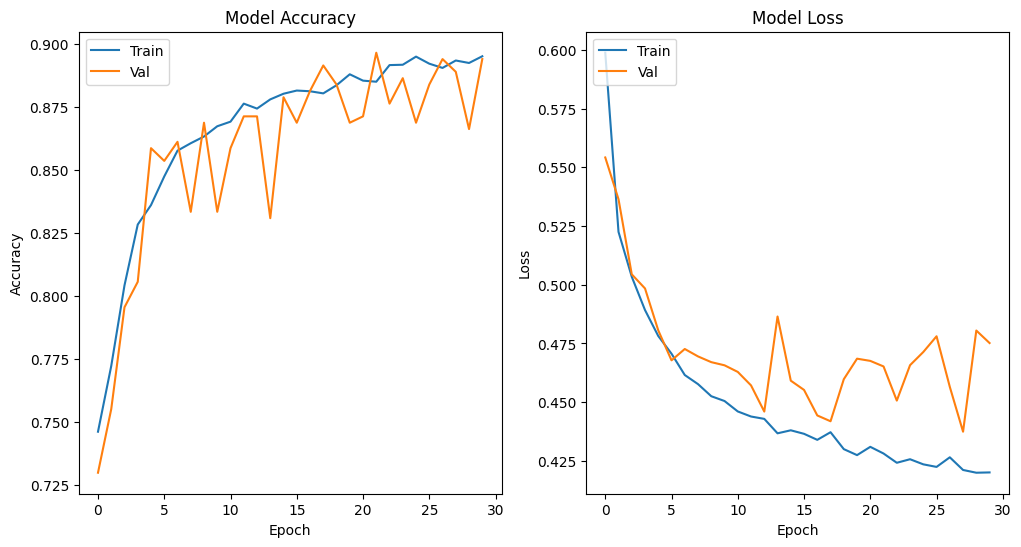

In [35]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

# **TFIDF WITH LSTM**

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score


# Define input shape based on your data
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])

# Create LSTM model
inputs = Input(shape=input_shape)
lstm_layer = LSTM(64,kernel_regularizer=regularizers.l2(0.01))(inputs)  # LSTM layer with 128 units
outputs = Dense(1, activation='sigmoid')(lstm_layer)  # Output layer with sigmoid activation for binary classification
LSTM_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
LSTM_model.summary()

# Train the model
history_LSTM_TFIDF = LSTM_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Evaluate the model
y_pred_probs = LSTM_model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 15922)]        0         
                                                                 
 lstm (LSTM)                 (None, 64)                4092672   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4092737 (15.61 MB)
Trainable params: 4092737 (15.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
223/223 [==============================] - 5s 16ms/step - loss: 0.7455 - accuracy: 0.7448 - val_loss: 0.5957 - val_accuracy: 0.7172
Epoch 2/30
223/223 [==============================] - 3s 14ms/step - loss: 0.5672 - accuracy: 0.7457 - val_loss: 0.5966 - val_accuracy: 0.71

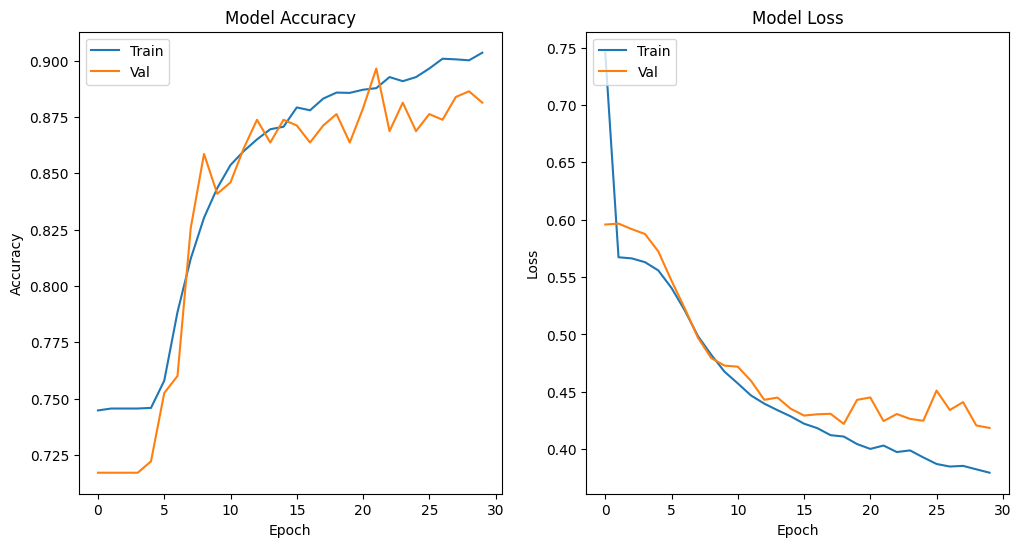

In [38]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_LSTM_TFIDF.history['accuracy'])
plt.plot(history_LSTM_TFIDF.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_LSTM_TFIDF.history['loss'])
plt.plot(history_LSTM_TFIDF.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                        | Value                                  | Part of Model or Process                  |
|---------------------------------------|----------------------------------------|------------------------------------------|
| `input_shape`                         | Dynamic (based on reshaped data)       | LSTM Model Input Layer                   |
| `units` in LSTM layer                 | `64`                                   | LSTM Layer                               |
| `kernel_regularizer`                  | `regularizers.l2(0.01)`                | LSTM Layer                               |
| `activation` function in `Dense` layer| `sigmoid`                              | Output Dense Layer                       |
| `optimizer`                           | `adam`                                 | Model Compilation                        |
| `loss function`                       | `binary_crossentropy`                  | Model Compilation                        |
| `metrics`                             | `accuracy`                             | Model Compilation                        |
| `epochs`                              | `30`                                   | Model Training                           |
| `batch_size`                          | `32`                                   | Model Training                           |
| `validation_data`                     | `(X_val_reshaped, y_val)`              | Model Training                           |
| `vectorization`                       | `TF-IDF`                               |  as part of data preparation      |


# **TFIDF**-GRU

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score


# Define input shape based on your data
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])

# Create GRU model
inputs = Input(shape=input_shape)
gru_layer = GRU(128,kernel_regularizer=regularizers.l2(0.01))(inputs)  # GRU layer with 128 units
outputs = Dense(1, activation='sigmoid')(gru_layer)  # Output layer with sigmoid activation for binary classification
model_TFIDF_GRU = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_TFIDF_GRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_TFIDF_GRU.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 15922)]        0         
                                                                 
 gru (GRU)                   (None, 128)               6163968   
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 6164097 (23.51 MB)
Trainable params: 6164097 (23.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Train the model
history_TFIDF_GRU = model_TFIDF_GRU.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Evaluate the model
y_pred_probs = model_TFIDF_GRU.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())


Epoch 1/30
223/223 [==============================] - 6s 21ms/step - loss: 0.7852 - accuracy: 0.7455 - val_loss: 0.5915 - val_accuracy: 0.7172
Epoch 2/30
223/223 [==============================] - 4s 20ms/step - loss: 0.5608 - accuracy: 0.7457 - val_loss: 0.5841 - val_accuracy: 0.7197
Epoch 3/30
223/223 [==============================] - 4s 19ms/step - loss: 0.5447 - accuracy: 0.7681 - val_loss: 0.5497 - val_accuracy: 0.7677
Epoch 4/30
223/223 [==============================] - 4s 20ms/step - loss: 0.5255 - accuracy: 0.8107 - val_loss: 0.5384 - val_accuracy: 0.7828
Epoch 5/30
223/223 [==============================] - 5s 21ms/step - loss: 0.5125 - accuracy: 0.8338 - val_loss: 0.5257 - val_accuracy: 0.8611
Epoch 6/30
223/223 [==============================] - 5s 21ms/step - loss: 0.5029 - accuracy: 0.8461 - val_loss: 0.4970 - val_accuracy: 0.8636
Epoch 7/30
223/223 [==============================] - 5s 22ms/step - loss: 0.4951 - accuracy: 0.8545 - val_loss: 0.4928 - val_accuracy: 0.8687

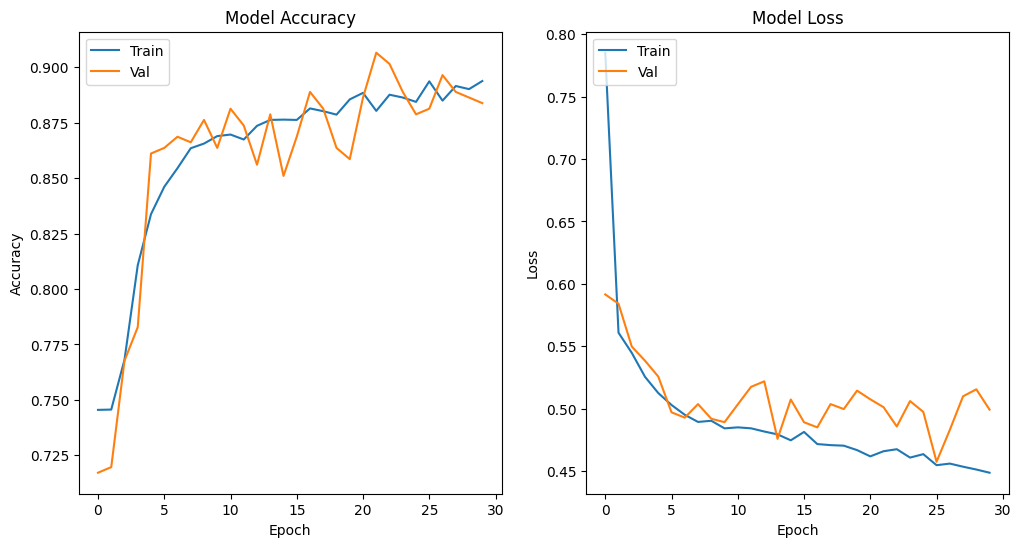

In [41]:

import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_TFIDF_GRU.history['accuracy'])
plt.plot(history_TFIDF_GRU.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_TFIDF_GRU.history['loss'])
plt.plot(history_TFIDF_GRU.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                        | Value                                  | Part of Model or Process                  |
|---------------------------------------|----------------------------------------|------------------------------------------|
| `input_shape`                         | Dynamic (based on reshaped data)       | GRU Model Input Layer                    |
| `units` in GRU layer                  | `128`                                  | GRU Layer                                |
| `kernel_regularizer`                  | `regularizers.l2(0.01)`                | GRU Layer                                |
| `activation` function in `Dense` layer| `sigmoid`                              | Output Dense Layer                       |
| `optimizer`                           | `adam`                                 | Model Compilation                        |
| `loss function`                       | `binary_crossentropy`                  | Model Compilation                        |
| `metrics`                             | `accuracy`                             | Model Compilation                        |
| `epochs`                              | `30`                                   | Model Training                           |
| `batch_size`                          | `32`                                   | Model Training                           |
| `validation_data`                     | `(X_val_reshaped, y_val)`              | Model Training                           |


## **TFIDF -BILSTM**

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score


# Define input shape based on your data
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])

# Create BiLSTM model
inputs = Input(shape=input_shape)
bilstm_layer = Bidirectional(LSTM(128, kernel_regularizer=regularizers.l2(0.01)))(inputs)  # Bidirectional LSTM layer with 128 units
outputs = Dense(1, activation='sigmoid')(bilstm_layer)  # Output layer with sigmoid activation for binary classification
model_bilstm_tfidf = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_bilstm_tfidf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bilstm_tfidf.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 15922)]        0         
                                                                 
 bidirectional (Bidirection  (None, 256)               16436224  
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16436481 (62.70 MB)
Trainable params: 16436481 (62.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:


# Train the model
history_bilstm_tfid = model_bilstm_tfidf.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_val_reshaped, y_val))
# Evaluate the model
y_pred_probs = model_bilstm_tfidf.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())



Epoch 1/30
223/223 [==============================] - 4s 9ms/step - loss: 1.1301 - accuracy: 0.7442 - val_loss: 0.6005 - val_accuracy: 0.7172
Epoch 2/30
223/223 [==============================] - 2s 8ms/step - loss: 0.5748 - accuracy: 0.7457 - val_loss: 0.6091 - val_accuracy: 0.7172
Epoch 3/30
223/223 [==============================] - 2s 8ms/step - loss: 0.5767 - accuracy: 0.7457 - val_loss: 0.6021 - val_accuracy: 0.7172
Epoch 4/30
223/223 [==============================] - 2s 8ms/step - loss: 0.5771 - accuracy: 0.7471 - val_loss: 0.5940 - val_accuracy: 0.7247
Epoch 5/30
223/223 [==============================] - 2s 8ms/step - loss: 0.5724 - accuracy: 0.7674 - val_loss: 0.5883 - val_accuracy: 0.7626
Epoch 6/30
223/223 [==============================] - 2s 8ms/step - loss: 0.5602 - accuracy: 0.8077 - val_loss: 0.5653 - val_accuracy: 0.8056
Epoch 7/30
223/223 [==============================] - 2s 8ms/step - loss: 0.5489 - accuracy: 0.8294 - val_loss: 0.5548 - val_accuracy: 0.8611
Epoch 

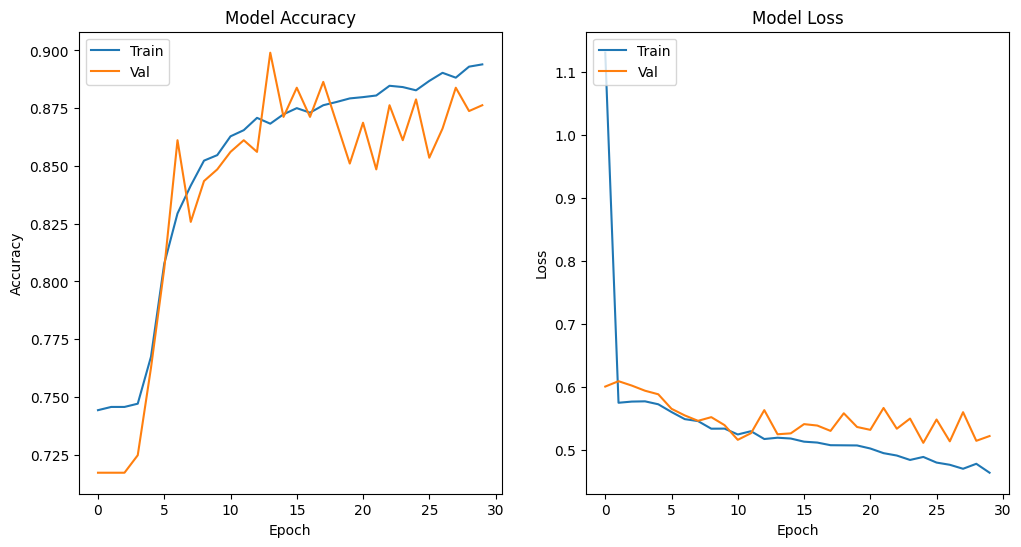

In [ ]:

import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_bilstm_tfid.history['accuracy'])
plt.plot(history_bilstm_tfid.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_bilstm_tfid.history['loss'])
plt.plot(history_bilstm_tfid.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                        | Value                                  | Part of Model or Process                  |
|---------------------------------------|----------------------------------------|------------------------------------------|
| `input_shape`                         | Dynamic (based on reshaped data)       | BiLSTM Model Input Layer                 |
| `units` in BiLSTM layer               | `128`                                  | Bidirectional LSTM Layer                 |
| `kernel_regularizer`                  | `regularizers.l2(0.01)`                | Bidirectional LSTM Layer                 |
| `activation` function in `Dense` layer| `sigmoid`                              | Output Dense Layer                       |
| `optimizer`                           | `adam`                                 | Model Compilation                        |
| `loss function`                       | `binary_crossentropy`                  | Model Compilation                        |
| `metrics`                             | `accuracy`                             | Model Compilation                        |
| `epochs`                              | `30`                                   | Model Training                           |
| `batch_size`                          | `32`                                   | Model Training                           |
| `validation_data`                     | `(X_val_reshaped, y_val)`              | Model Training                           |


## **Word2Vec simple RNN**

In [ ]:
import pandas as pd
from gensim.models import Word2Vec



data['tokens'] = data['lemmatized_sentence'].apply(lambda x: x.split())

# Prepare data for Word2Vec
sentences = data['tokens'].tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Summarize the loaded model
print(word2vec_model)


Word2Vec<vocab=16083, vector_size=100, alpha=0.025>


In [ ]:
print(data.info())
print(data['tokens'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   id                                 7920 non-null   int64 
 1   label                              7920 non-null   int64 
 2   tweet                              7920 non-null   object
 3   contains_url                       7920 non-null   bool  
 4   cleaned_tweet                      7920 non-null   object
 5   contains_url_after_clean           7920 non-null   bool  
 6   processed_tweet                    7920 non-null   object
 7   contains_numbers                   7920 non-null   bool  
 8   refined_tweet                      7920 non-null   object
 9   contains_number_after_clean        7920 non-null   bool  
 10  contains_html                      7920 non-null   bool  
 11  cleansed_tweet                     7920 non-null   object
 12  proces

In [44]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split

# Load your Word2Vec model
model = Word2Vec.load("word2vec_model.bin")

# Generate sentence vectors by averaging word vectors
def sentence_vector(sentence):
    # Filter out words that are not in the Word2Vec vocabulary
    words = [word for word in sentence if word in model.wv]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if sentence has no words in vocab

# Apply this to each sentence in your dataset
data['sentence_vector'] = data['tokens'].apply(sentence_vector)

# Create a matrix of sentence vectors
X = np.array(list(data['sentence_vector']))
# Print the first few sentence vectors from X
print("First few sentence vectors from X:")
print(X[:1])

y = data['label']

# Split the data into training and temporary (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


First few sentence vectors from X:
[[-0.13072927  0.15941411  0.15516336  0.05597702 -0.05843768 -0.48150876
   0.1206233   0.6689315  -0.15238206 -0.13621187 -0.08096719 -0.44112918
   0.01472465  0.0821498   0.04366412 -0.1610592   0.01907016 -0.27046895
  -0.14802517 -0.4532732   0.18811503  0.14581485  0.21467225 -0.12820968
  -0.00568059 -0.0309726  -0.14396688 -0.11784253 -0.2873199  -0.02221222
   0.10615677  0.07820786  0.08860466 -0.36882114 -0.15614907  0.29267415
   0.0471185  -0.10239049 -0.11313735 -0.4893454   0.0245612  -0.23002042
  -0.0915892  -0.02875118  0.11346669 -0.00617783 -0.22626689  0.03588932
   0.14305188  0.13423398  0.12516533 -0.19082162 -0.09117348 -0.03043744
  -0.18060274  0.08249983  0.12130326  0.00888427 -0.29947317  0.17125581
   0.01917044  0.03589718 -0.08635121 -0.03450458 -0.3361301   0.20982915
   0.04209284  0.27486187 -0.38628     0.31578526 -0.11821095  0.14718112
   0.2576702  -0.03088037  0.34725457  0.10609664 -0.01724934 -0.02033825
  -

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Reshape X_train, X_val, and X_test to include timestep dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

input_shape = (1, X_train.shape[1])



# Create an RNN model
inputs = Input(shape=input_shape)
rnn_layer = SimpleRNN(32)(inputs)
outputs = Dense(1, activation='sigmoid')(rnn_layer)
word2vec_rnn_model = Model(inputs=inputs, outputs=outputs)


# Compile the model
word2vec_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
word2vec_rnn_model.summary()



# Train the model
history_rnn_word2vec = word2vec_rnn_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=128, validation_data=(X_val_reshaped, y_val))



Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_26 (SimpleRNN)       │ (None, 32)             │         4,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7319 - loss: 0.5661 - val_accuracy: 0.7298 - val_loss: 0.5110
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7704 - loss: 0.4612 - val_accuracy: 0.7500 - val_loss: 0.4765
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.7831 - loss: 0.4458 - val_accuracy: 0.7753 - val_loss: 0.4567
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8061 - loss: 0.4048 - val_accuracy: 0.7753 - val_loss: 0.4344
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 0.4036 - val_accuracy: 0.8056 - val_loss: 0.4174
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8133 - loss: 0.4056 - val_accuracy: 0.7929 - val_loss: 0.4107
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8105 - loss: 0.3999 - val_accuracy: 0.7904 - val_loss: 0.4116
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8192 - loss: 0.3796 - val_accuracy: 0.7980 - val_los

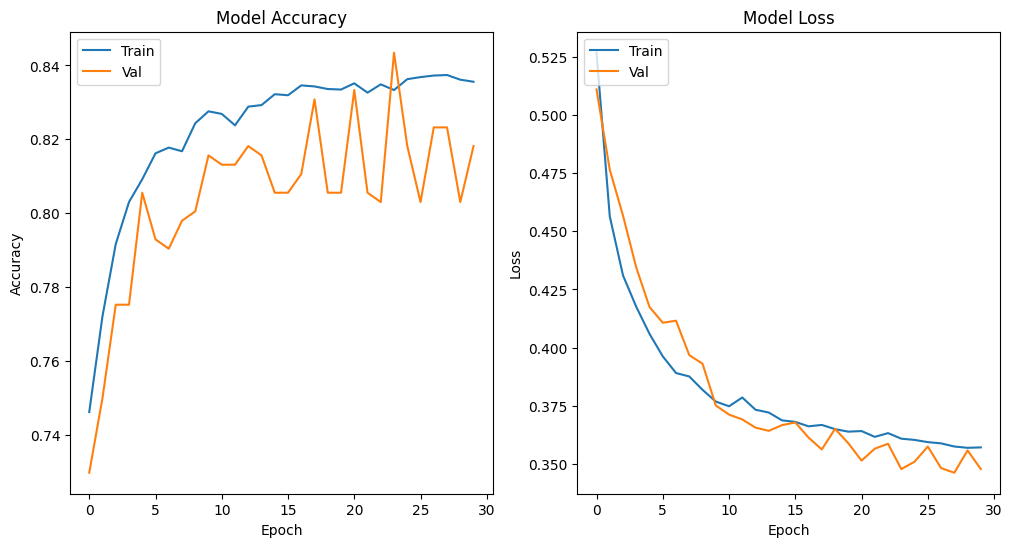

In [ ]:

import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_rnn_word2vec.history['accuracy'])
plt.plot(history_rnn_word2vec.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_rnn_word2vec.history['loss'])
plt.plot(history_rnn_word2vec.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

In [ ]:
y_pred_probs = word2vec_rnn_model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

# Generate classification report with zero_division='warn'
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True, zero_division='warn')

# Print classification report
print(pd.DataFrame(report).transpose())

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
              precision    recall  f1-score     support
Class 0        0.868502  0.962712  0.913183  295.000000
Class 1        0.840580  0.574257  0.682353  101.000000
accuracy       0.863636  0.863636  0.863636    0.863636
macro avg      0.854541  0.768485  0.797768  396.000000
weighted avg   0.861380  0.863636  0.854310  396.000000


| Hyperparameter                        | Value                                  | Part of Model or Process                  |
|---------------------------------------|----------------------------------------|------------------------------------------|
| `input_shape`                         | `(1, X_train.shape[1])`                | RNN Model Input Layer                    |
| `units` in SimpleRNN layer            | `32`                                   | SimpleRNN Layer                          |
| `activation` function in `Dense` layer| `sigmoid`                              | Output Dense Layer                       |
| `optimizer`                           | `adam`                                 | Model Compilation                        |
| `loss function`                       | `binary_crossentropy`                  | Model Compilation                        |
| `metrics`                             | `accuracy`                             | Model Compilation                        |
| `epochs`                              | `30`                                   | Model Training                           |
| `batch_size`                          | `128`                                  | Model Training                           |
| `validation_data`                     | `(X_val_reshaped, y_val)`              | Model Training                           |


## **Word2Vec with LSTM**

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout

# Define input shape based on your data
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])

# Create LSTM model
inputs = Input(shape=input_shape)
lstm_layer = LSTM(64,kernel_regularizer=regularizers.l2(0.01))(inputs)  # LSTM layer with 128 units
outputs = Dense(1, activation='sigmoid')(lstm_layer)  # Output layer with sigmoid activation for binary classification
model_word2vec_lstm = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_word2vec_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_word2vec_lstm.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1, 15922)]        0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                4092672   
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4092737 (15.61 MB)
Trainable params: 4092737 (15.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history_word2vec_lstm = model_word2vec_lstm.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/20
223/223 [==============================] - 3s 8ms/step - loss: 0.8350 - accuracy: 0.7445 - val_loss: 0.5624 - val_accuracy: 0.7172
Epoch 2/20
223/223 [==============================] - 2s 9ms/step - loss: 0.5151 - accuracy: 0.7604 - val_loss: 0.5261 - val_accuracy: 0.7348
Epoch 3/20
223/223 [==============================] - 3s 13ms/step - loss: 0.4865 - accuracy: 0.7761 - val_loss: 0.5124 - val_accuracy: 0.7475
Epoch 4/20
223/223 [==============================] - 3s 13ms/step - loss: 0.4695 - accuracy: 0.7886 - val_loss: 0.4825 - val_accuracy: 0.7778
Epoch 5/20
223/223 [==============================] - 2s 10ms/step - loss: 0.4572 - accuracy: 0.7907 - val_loss: 0.4893 - val_accuracy: 0.7626
Epoch 6/20
223/223 [==============================] - 4s 18ms/step - loss: 0.4503 - accuracy: 0.7981 - val_loss: 0.5162 - val_accuracy: 0.7348
Epoch 7/20
223/223 [==============================] - 2s 8ms/step - loss: 0.4464 - accuracy: 0.8009 - val_loss: 0.4845 - val_accuracy: 0.7955
Ep

In [ ]:
# Train the model
y_pred_probs = model_word2vec_lstm.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())


13/13 [==============================] - 0s 21ms/step
              precision    recall  f1-score  support
Class 0        0.831884  0.972881  0.896875    295.0
Class 1        0.843137  0.425743  0.565789    101.0
macro avg      0.837511  0.699312  0.731332    396.0
weighted avg   0.834754  0.833333  0.812431    396.0


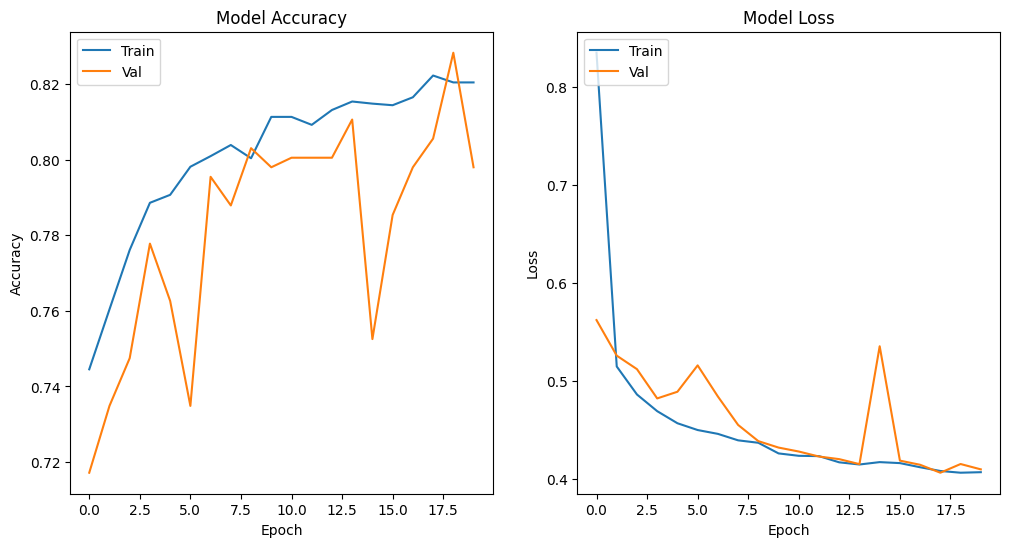

In [ ]:

import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_word2vec_lstm.history['accuracy'])
plt.plot(history_word2vec_lstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_word2vec_lstm.history['loss'])
plt.plot(history_word2vec_lstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                        | Value                                  | Part of Model or Process                  |
|---------------------------------------|----------------------------------------|------------------------------------------|
| `input_shape`                         | Dynamic (based on reshaped data)       | LSTM Model Input Layer                   |
| `Word2Vec Embedding`                  | `300` dimensions, not trainable        | Embedding Layer initialized with Word2Vec|
| `units` in LSTM layer                 | `64`                                   | LSTM Layer                               |
| `kernel_regularizer`                  | `regularizers.l2(0.01)`                | LSTM Layer                               |
| `activation` function in `Dense` layer| `sigmoid`                              | Output Dense Layer                       |
| `optimizer`                           | `adam`                                 | Model Compilation                        |
| `loss function`                       | `binary_crossentropy`                  | Model Compilation                        |
| `metrics`                             | `accuracy`                             | Model Compilation                        |
| `epochs`                              | `20`                                   | Model Training                           |
| `batch_size`                          | `32`                                   | Model Training                           |
| `validation_data`                     | `(X_val_reshaped, y_val)`              | Model Training                           |


## **Word2Vec GRU**

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score


# Define input shape based on your data
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])

# Create GRU model
inputs = Input(shape=input_shape)
gru_layer = GRU(256)(inputs)  # GRU layer with 128 units
outputs = Dense(1, activation='sigmoid')(gru_layer)  # Output layer with sigmoid activation for binary classification
model_word2vec_gru = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_word2vec_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_word2vec_gru.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1, 15922)]        0         
                                                                 
 gru_1 (GRU)                 (None, 256)               12426240  
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 12426497 (47.40 MB)
Trainable params: 12426497 (47.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# Train the model
history_word2vec_gru = model_word2vec_gru.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/30
223/223 [==============================] - 3s 8ms/step - loss: 0.4566 - accuracy: 0.7810 - val_loss: 0.4293 - val_accuracy: 0.7828
Epoch 2/30
223/223 [==============================] - 2s 10ms/step - loss: 0.4013 - accuracy: 0.8124 - val_loss: 0.3836 - val_accuracy: 0.8157
Epoch 3/30
223/223 [==============================] - 2s 7ms/step - loss: 0.3805 - accuracy: 0.8235 - val_loss: 0.3711 - val_accuracy: 0.8384
Epoch 4/30
223/223 [==============================] - 2s 7ms/step - loss: 0.3753 - accuracy: 0.8280 - val_loss: 0.3912 - val_accuracy: 0.7955
Epoch 5/30
223/223 [==============================] - 1s 5ms/step - loss: 0.3684 - accuracy: 0.8307 - val_loss: 0.3763 - val_accuracy: 0.8056
Epoch 6/30
223/223 [==============================] - 2s 8ms/step - loss: 0.3679 - accuracy: 0.8312 - val_loss: 0.3612 - val_accuracy: 0.8131
Epoch 7/30
223/223 [==============================] - 1s 6ms/step - loss: 0.3654 - accuracy: 0.8302 - val_loss: 0.3740 - val_accuracy: 0.7980
Epoch

In [ ]:
# Train the model
y_pred_probs = model_word2vec_gru.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())

13/13 [==============================] - 1s 14ms/step
              precision    recall  f1-score  support
Class 0        0.897106  0.945763  0.920792    295.0
Class 1        0.811765  0.683168  0.741935    101.0
macro avg      0.854435  0.814466  0.831364    396.0
weighted avg   0.875340  0.878788  0.875175    396.0


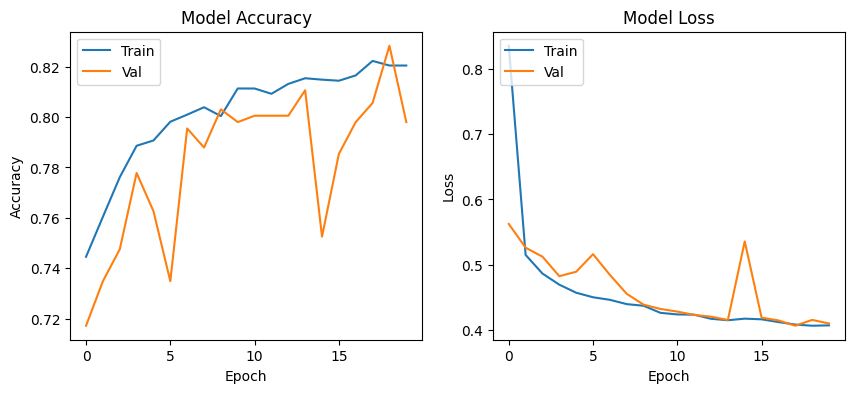

In [ ]:

import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_word2vec_lstm.history['accuracy'])
plt.plot(history_word2vec_lstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_word2vec_lstm.history['loss'])
plt.plot(history_word2vec_lstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                        | Value                                  | Part of Model or Process                  |
|---------------------------------------|----------------------------------------|------------------------------------------|
| `input_shape`                         | Dynamic (based on reshaped data)       | GRU Model Input Layer                    |
| `units` in GRU layer                  | `256`                                  | GRU Layer                                |
| `activation` function in `Dense` layer| `sigmoid`                              | Output Dense Layer                       |
| `optimizer`                           | `adam`                                 | Model Compilation                        |
| `loss function`                       | `binary_crossentropy`                  | Model Compilation                        |
| `metrics`                             | `accuracy`                             | Model Compilation                        |
| `epochs`                              | `30`                                   | Model Training                           |
| `batch_size`                          | `32`                                   | Model Training                           |
| `validation_data`                     | `(X_val_reshaped, y_val)`              | Model Training                           |
| `Word2Vec Embedding`                  | `300` dimensions, not trainable        | input data preparation |


## **Word2Vec BILSTM**

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score


# Define input shape based on your data
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])

# Create BiLSTM model
inputs = Input(shape=input_shape)
bilstm_layer = Bidirectional(LSTM(256))(inputs)  # Bidirectional LSTM layer with 128 units
outputs = Dense(1, activation='sigmoid')(bilstm_layer)  # Output layer with sigmoid activation for binary classification
model_bistm_word2vec = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_bistm_word2vec.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bistm_word2vec.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1, 15922)]        0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 512)               33134592  
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 1)                 513       
                                                                 
Total params: 33135105 (126.40 MB)
Trainable params: 33135105 (126.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:


# Train the model
history_bistm_word2vec = model_bistm_word2vec.fit(X_train_reshaped, y_train, epochs=30, batch_size=128, validation_data=(X_val_reshaped, y_val))

Epoch 1/30
56/56 [==============================] - 7s 93ms/step - loss: 0.5320 - accuracy: 0.7379 - val_loss: 0.5022 - val_accuracy: 0.7475
Epoch 2/30
56/56 [==============================] - 0s 8ms/step - loss: 0.4422 - accuracy: 0.7851 - val_loss: 0.4530 - val_accuracy: 0.7702
Epoch 3/30
56/56 [==============================] - 1s 10ms/step - loss: 0.4126 - accuracy: 0.8043 - val_loss: 0.4180 - val_accuracy: 0.7955
Epoch 4/30
56/56 [==============================] - 1s 9ms/step - loss: 0.3960 - accuracy: 0.8148 - val_loss: 0.3890 - val_accuracy: 0.8131
Epoch 5/30
56/56 [==============================] - 1s 9ms/step - loss: 0.3848 - accuracy: 0.8220 - val_loss: 0.3906 - val_accuracy: 0.8434
Epoch 6/30
56/56 [==============================] - 0s 8ms/step - loss: 0.3781 - accuracy: 0.8258 - val_loss: 0.3679 - val_accuracy: 0.8232
Epoch 7/30
56/56 [==============================] - 1s 9ms/step - loss: 0.3725 - accuracy: 0.8284 - val_loss: 0.3744 - val_accuracy: 0.8030
Epoch 8/30
56/56 [

In [ ]:
# Train the model
y_pred_probs = model_bistm_word2vec.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())

13/13 [==============================] - 1s 29ms/step
              precision    recall  f1-score  support
Class 0        0.878505  0.955932  0.915584    295.0
Class 1        0.826667  0.613861  0.704545    101.0
macro avg      0.852586  0.784897  0.810065    396.0
weighted avg   0.865283  0.868687  0.861759    396.0


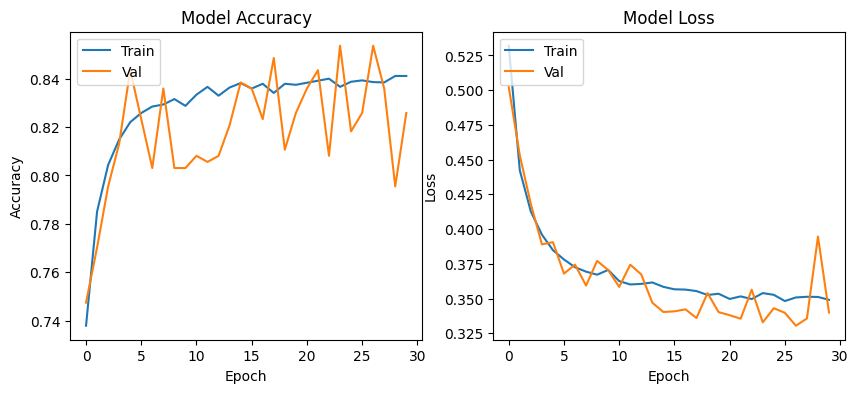

In [ ]:

import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_bistm_word2vec.history['accuracy'])
plt.plot(history_bistm_word2vec.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_bistm_word2vec.history['loss'])
plt.plot(history_bistm_word2vec.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                        | Value                                  | Part of Model or Process                  |
|---------------------------------------|----------------------------------------|------------------------------------------|
| `input_shape`                         | Dynamic (based on reshaped data)       | BiLSTM Model Input Layer                 |
| `units` in BiLSTM layer               | `256`| Bidirectional LSTM Layer                 |
| `activation` function in `Dense` layer| `sigmoid`                              | Output Dense Layer                       |
| `optimizer`                           | `adam`                                 | Model Compilation                        |
| `loss function`                       | `binary_crossentropy`                  | Model Compilation                        |
| `metrics`                             | `accuracy`                             | Model Compilation                        |
| `epochs`                              | `30`                                   | Model Training                           |
| `batch_size`                          | `128`                                  | Model Training                           |
| `validation_data`                     | `(X_val_reshaped, y_val)`              | Model Training                           |
| `Word2Vec Embedding`                  | `300` dimensions, not trainable        |input data preparation |


## **GLOVE RNN**

In [ ]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import pandas as pd



# Convert GloVe format to Word2Vec format
glove_file_path = 'glove.6B.100d.txt'  # Update path as necessary
word2vec_output_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_file_path, word2vec_output_file)

# Load the converted GloVe model as a Word2Vec model
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

/tmp/ipykernel_23288/1930190308.py:10: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file_path, word2vec_output_file)


In [48]:
import numpy as np
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
import pandas as pd

glove_model = KeyedVectors.load_word2vec_format('glove.6B.100d.word2vec.txt', binary=False)


# Ensure that each sentence is a list of words
data['tokens'] = data['lemmatized_sentence'].apply(lambda x: x.split())

# Generate sentence vectors by averaging word vectors
def sentence_vector(sentence):
    # Filter out words that are not in the GloVe vocabulary
    words = [word for word in sentence if word in glove_model]
    if len(words) >= 1:
        return np.mean(glove_model[words], axis=0)
    else:
        return np.zeros(glove_model.vector_size)  # Return a zero vector if sentence has no words in vocab

# Apply this to each sentence in your dataset
data['sentence_vector'] = data['tokens'].apply(sentence_vector)

# Create a matrix of sentence vectors
X = np.array(list(data['sentence_vector']))
print("First few sentence vectors from X:")
print(X[:3])

y = data['label']

# Split the data into training and temporary (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


First few sentence vectors from X:
[[-0.16532908 -0.1362993   0.35794568 -0.12303589 -0.1761485  -0.03509551
   0.15993622  0.06051639  0.30440202  0.20206711  0.05709781 -0.1438888
   0.17863299 -0.28072429  0.52078307  0.17571881  0.21509051  0.45267305
   0.10079011  0.38635525 -0.15482573 -0.43381125  0.24090418  0.45203099
   0.16501346  0.57863796  0.05329701 -0.1083004  -0.60418898 -0.00982801
   0.1931181   0.64080596  0.07657404  0.02190439  0.49540097  0.25221482
  -0.60501444  0.01332169  0.06138001 -0.2616266   0.01878009  0.20030451
  -0.0639276  -0.28527111 -0.2174135   0.28928709 -0.00378259 -0.05665501
   0.0505598  -0.14987651  0.135455   -0.13375691  0.14081399  0.32042879
  -0.0983115  -1.07541597 -0.18727198  0.06826819  0.63027346 -0.075087
  -0.0457129   0.50282872  0.00628301  0.1087713   0.2986024   0.25063449
   0.05675377 -0.09760471  0.3638607  -0.31823093  0.22689381  0.44753891
  -0.05687601 -0.24894309  0.16557807  0.35313451 -0.010635   -0.15202868
  -0.4

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers


# Reshape X_train, X_val, and X_test to include timestep dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

input_shape = (1, X_train.shape[1])

# Create an RNN model
inputs = Input(shape=input_shape)
rnn_layer = SimpleRNN(64,kernel_regularizer=regularizers.l2(0.001))(inputs)

glove_rnn_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
glove_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
glove_rnn_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 100)]          0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                10560     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history_rnn_glove = glove_rnn_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/30
223/223 [==============================] - 2s 7ms/step - loss: 0.4656 - accuracy: 0.8190 - val_loss: 0.4045 - val_accuracy: 0.8384
Epoch 2/30
223/223 [==============================] - 1s 7ms/step - loss: 0.3815 - accuracy: 0.8604 - val_loss: 0.3837 - val_accuracy: 0.8434
Epoch 3/30
223/223 [==============================] - 2s 7ms/step - loss: 0.3611 - accuracy: 0.8636 - val_loss: 0.3652 - val_accuracy: 0.8510
Epoch 4/30
223/223 [==============================] - 1s 6ms/step - loss: 0.3486 - accuracy: 0.8662 - val_loss: 0.3612 - val_accuracy: 0.8535
Epoch 5/30
223/223 [==============================] - 1s 5ms/step - loss: 0.3408 - accuracy: 0.8671 - val_loss: 0.3545 - val_accuracy: 0.8535
Epoch 6/30
223/223 [==============================] - 1s 4ms/step - loss: 0.3345 - accuracy: 0.8691 - val_loss: 0.3464 - val_accuracy: 0.8561
Epoch 7/30
223/223 [==============================] - 1s 5ms/step - loss: 0.3321 - accuracy: 0.8688 - val_loss: 0.3543 - val_accuracy: 0.8485
Epoch 

In [ ]:
# Train the model

from sklearn.metrics import classification_report
y_pred_probs = glove_rnn_model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())

13/13 [==============================] - 1s 18ms/step
              precision    recall  f1-score  support
Class 0        0.911111  0.972881  0.940984    295.0
Class 1        0.901235  0.722772  0.802198    101.0
macro avg      0.906173  0.847827  0.871591    396.0
weighted avg   0.908592  0.909091  0.905586    396.0


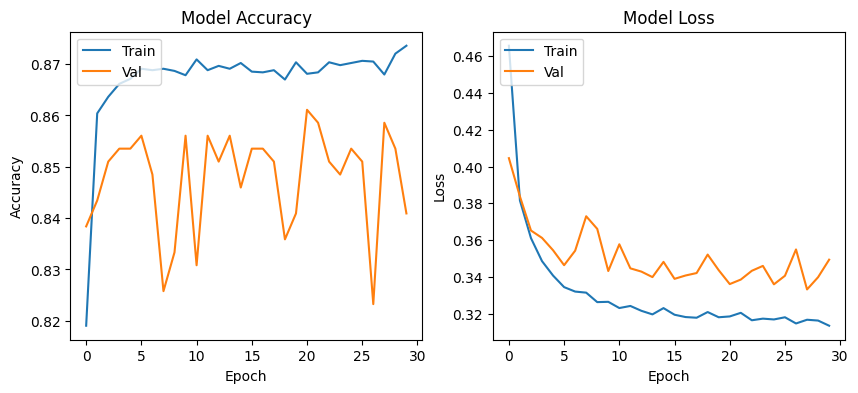

In [ ]:

import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_rnn_glove.history['accuracy'])
plt.plot(history_rnn_glove.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_rnn_glove.history['loss'])
plt.plot(history_rnn_glove.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                        | Value                                  | Part of Model or Process                  |
|---------------------------------------|----------------------------------------|------------------------------------------|
| `input_shape`                         | `(1, X_train.shape[1])`                | RNN Model Input Layer                    |
| `units` in SimpleRNN layer            | `64`                                   | SimpleRNN Layer                          |
| `kernel_regularizer`                  | `regularizers.l2(0.001)`               | SimpleRNN Layer                          |
| `activation` function in `Dense` layer| `sigmoid`                              | Output Dense Layer                       |
| `optimizer`                           | `adam`                                 | Model Compilation                        |
| `loss function`                       | `binary_crossentropy`                  | Model Compilation                        |
| `metrics`                             | `accuracy`                             | Model Compilation                        |
| `epochs`                              | `30`                                   | Model Training                           |
| `batch_size`                          | `32`                                   | Model Training                           |
| `validation_data`                     | `(X_val_reshaped, y_val)`              | Model Training                           |
| `GloVe Embedding`                     | `100` dimensions, converted to Word2Vec| Preprocessing                            |


## **GLOVE LSTM**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

# Reshape X_train, X_val, and X_test to include timestep dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

input_shape = (1, X_train.shape[1])

# Create an RNN model with LSTM
inputs = Input(shape=input_shape)
lstm_layer = LSTM(128,kernel_regularizer=regularizers.l2(0.001))(inputs)  # Replacing SimpleRNN with LSTM
outputs = Dense(1, activation='sigmoid')(lstm_layer)
glove_lstm_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
glove_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
glove_lstm_model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1, 100)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 117377 (458.50 KB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history_glove_lstm= glove_lstm_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/30
223/223 [==============================] - 3s 8ms/step - loss: 0.4870 - accuracy: 0.8093 - val_loss: 0.3908 - val_accuracy: 0.8485
Epoch 2/30
223/223 [==============================] - 1s 5ms/step - loss: 0.3671 - accuracy: 0.8575 - val_loss: 0.3629 - val_accuracy: 0.8535
Epoch 3/30
223/223 [==============================] - 1s 5ms/step - loss: 0.3496 - accuracy: 0.8642 - val_loss: 0.3585 - val_accuracy: 0.8510
Epoch 4/30
223/223 [==============================] - 1s 4ms/step - loss: 0.3440 - accuracy: 0.8622 - val_loss: 0.3730 - val_accuracy: 0.8283
Epoch 5/30
223/223 [==============================] - 1s 5ms/step - loss: 0.3381 - accuracy: 0.8656 - val_loss: 0.3568 - val_accuracy: 0.8535
Epoch 6/30
223/223 [==============================] - 1s 4ms/step - loss: 0.3334 - accuracy: 0.8670 - val_loss: 0.3728 - val_accuracy: 0.8384
Epoch 7/30
223/223 [==============================] - 1s 5ms/step - loss: 0.3303 - accuracy: 0.8685 - val_loss: 0.3744 - val_accuracy: 0.8232
Epoch 

In [ ]:
# Train the model

from sklearn.metrics import classification_report
y_pred_probs = glove_lstm_model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())

13/13 [==============================] - 0s 25ms/step
              precision    recall  f1-score  support
Class 0        0.911392  0.976271  0.942717    295.0
Class 1        0.912500  0.722772  0.806630    101.0
macro avg      0.911946  0.849522  0.874673    396.0
weighted avg   0.911675  0.911616  0.908008    396.0


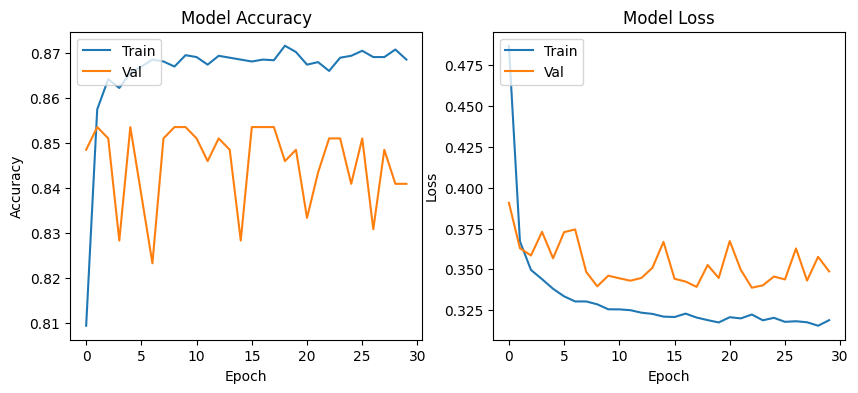

In [ ]:

import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glove_lstm.history['accuracy'])
plt.plot(history_glove_lstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_glove_lstm.history['loss'])
plt.plot(history_glove_lstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                        | Value                                  | Part of Model or Process                  |
|---------------------------------------|----------------------------------------|------------------------------------------|
| `input_shape`                         | `(1, X_train.shape[1])`                | LSTM Model Input Layer                   |
| `units` in LSTM layer                 | `128`                                  | LSTM Layer                               |
| `kernel_regularizer`                  | `regularizers.l2(0.001)`               | LSTM Layer                               |
| `activation` function in `Dense` layer| `sigmoid`                              | Output Dense Layer                       |
| `optimizer`                           | `adam`                                 | Model Compilation                        |
| `loss function`                       | `binary_crossentropy`                  | Model Compilation                        |
| `metrics`                             | `accuracy`                             | Model Compilation                        |
| `epochs`                              | `30`                                   | Model Training                           |
| `batch_size`                          | `32`                                   | Model Training                           |
| `validation_data`                     | `(X_val_reshaped, y_val)`              | Model Training                           |
| ` Embedding`                     | `Glove`| input data preparation       |


## **GLOVE GRU**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GRU
from tensorflow.keras.models import Model

# Reshape X_train, X_val, and X_test to include timestep dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

input_shape = (1, X_train.shape[1])

# Create an RNN model with GRU
inputs = Input(shape=input_shape)
gru_layer = GRU(128,kernel_regularizer=regularizers.l2(0.001))(inputs)  # Using GRU instead of LSTM or SimpleRNN
outputs = Dense(1, activation='sigmoid')(gru_layer)
glove_gru_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
glove_gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
glove_gru_model.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1, 100)]          0         
                                                                 
 gru_1 (GRU)                 (None, 128)               88320     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 88449 (345.50 KB)
Trainable params: 88449 (345.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history_glove_gru = glove_gru_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/30
223/223 [==============================] - 4s 15ms/step - loss: 0.4717 - accuracy: 0.8201 - val_loss: 0.3782 - val_accuracy: 0.8535
Epoch 2/30
223/223 [==============================] - 3s 14ms/step - loss: 0.3627 - accuracy: 0.8587 - val_loss: 0.3645 - val_accuracy: 0.8409
Epoch 3/30
223/223 [==============================] - 3s 14ms/step - loss: 0.3428 - accuracy: 0.8674 - val_loss: 0.3668 - val_accuracy: 0.8308
Epoch 4/30
223/223 [==============================] - 3s 13ms/step - loss: 0.3395 - accuracy: 0.8642 - val_loss: 0.3577 - val_accuracy: 0.8485
Epoch 5/30
223/223 [==============================] - 3s 14ms/step - loss: 0.3301 - accuracy: 0.8684 - val_loss: 0.3519 - val_accuracy: 0.8434
Epoch 6/30
223/223 [==============================] - 3s 14ms/step - loss: 0.3318 - accuracy: 0.8650 - val_loss: 0.3453 - val_accuracy: 0.8460
Epoch 7/30
223/223 [==============================] - 1s 4ms/step - loss: 0.3292 - accuracy: 0.8674 - val_loss: 0.3520 - val_accuracy: 0.8510


In [ ]:
from sklearn.metrics import classification_report
y_pred_probs = glove_gru_model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())

13/13 [==============================] - 0s 1ms/step
              precision    recall  f1-score  support
Class 0        0.924590  0.955932  0.940000    295.0
Class 1        0.857143  0.772277  0.812500    101.0
macro avg      0.890867  0.864105  0.876250    396.0
weighted avg   0.907388  0.909091  0.907481    396.0


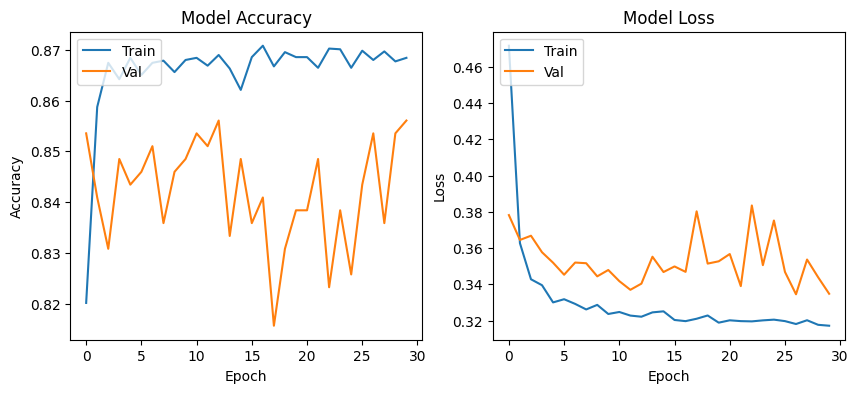

In [ ]:

import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glove_gru.history['accuracy'])
plt.plot(history_glove_gru.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_glove_gru.history['loss'])
plt.plot(history_glove_gru.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                        | Value                                  | Part of Model or Process                  |
|---------------------------------------|----------------------------------------|------------------------------------------|
| `input_shape`                         | `(1, X_train.shape[1])`                | GRU Model Input Layer                    |
| `units` in GRU layer                  | `128`                                  | GRU Layer                                |
| `kernel_regularizer`                  | `regularizers.l2(0.001)`               | GRU Layer                                |
| `activation` function in `Dense` layer| `sigmoid`                              | Output Dense Layer                       |
| `optimizer`                           | `adam`                                 | Model Compilation                        |
| `loss function`                       | `binary_crossentropy`                  | Model Compilation                        |
| `metrics`                             | `accuracy`                             | Model Compilation                        |
| `epochs`                              | `30`                                   | Model Training                           |
| `batch_size`                          | `32`                                   | Model Training                           |
| `validation_data`                     | `(X_val_reshaped, y_val)`              | Model Training                           |
| `GloVe Embedding`                     | `Used in input preparation, 128-dimensional` | Embedding Layer                       |


## **GLOVE BILSTM**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Model

# Reshape X_train, X_val, and X_test to include timestep dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

input_shape = (1, X_train.shape[1])

# Create an RNN model with a Bidirectional LSTM
inputs = Input(shape=input_shape)
bi_lstm_layer = Bidirectional(LSTM(128,kernel_regularizer=regularizers.l2(0.001)))(inputs)  # Wrap LSTM layer with Bidirectional
outputs = Dense(1, activation='sigmoid')(bi_lstm_layer)
glove_bilstm_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
glove_bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
glove_bilstm_model.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1, 100)]          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               234496    
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 234753 (917.00 KB)
Trainable params: 234753 (917.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history_glove_bilstm= glove_bilstm_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=16, validation_data=(X_val_reshaped, y_val))

Epoch 1/30
446/446 [==============================] - 14s 23ms/step - loss: 0.4538 - accuracy: 0.8297 - val_loss: 0.3804 - val_accuracy: 0.8384
Epoch 2/30
446/446 [==============================] - 10s 22ms/step - loss: 0.3573 - accuracy: 0.8620 - val_loss: 0.3707 - val_accuracy: 0.8409
Epoch 3/30
446/446 [==============================] - 10s 22ms/step - loss: 0.3445 - accuracy: 0.8617 - val_loss: 0.3589 - val_accuracy: 0.8586
Epoch 4/30
446/446 [==============================] - 12s 27ms/step - loss: 0.3420 - accuracy: 0.8611 - val_loss: 0.3631 - val_accuracy: 0.8333
Epoch 5/30
446/446 [==============================] - 10s 23ms/step - loss: 0.3386 - accuracy: 0.8648 - val_loss: 0.3441 - val_accuracy: 0.8561
Epoch 6/30
446/446 [==============================] - 10s 23ms/step - loss: 0.3339 - accuracy: 0.8670 - val_loss: 0.3465 - val_accuracy: 0.8510
Epoch 7/30
446/446 [==============================] - 12s 28ms/step - loss: 0.3310 - accuracy: 0.8690 - val_loss: 0.3552 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report
y_pred_probs = glove_bilstm_model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())

13/13 [==============================] - 0s 3ms/step
              precision    recall  f1-score  support
Class 0        0.924837  0.959322  0.941764    295.0
Class 1        0.866667  0.772277  0.816754    101.0
macro avg      0.895752  0.865800  0.879259    396.0
weighted avg   0.910000  0.911616  0.909880    396.0


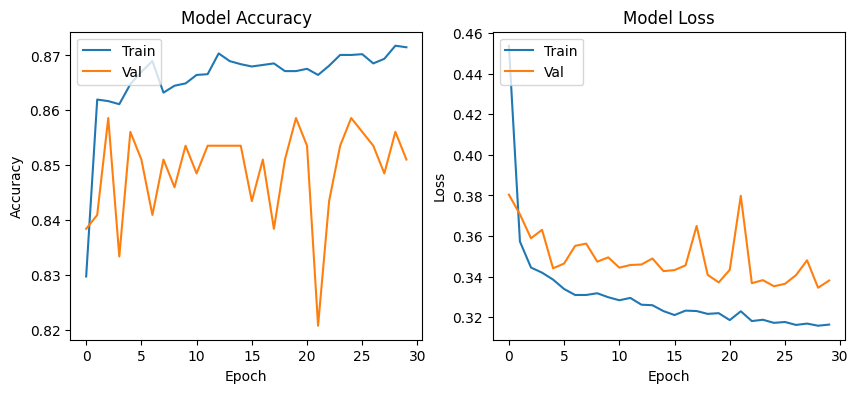

In [ ]:


import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glove_bilstm.history['accuracy'])
plt.plot(history_glove_bilstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_glove_bilstm.history['loss'])
plt.plot(history_glove_bilstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                        | Value                                  | Part of Model or Process                  |
|---------------------------------------|----------------------------------------|------------------------------------------|
| `input_shape`                         | `(1, X_train.shape[1])`                | BiLSTM Model Input Layer                 |
| `units` in BiLSTM layer               | `128` (per direction, total 256)       | Bidirectional LSTM Layer                 |
| `kernel_regularizer`                  | `regularizers.l2(0.001)`               | Bidirectional LSTM Layer                 |
| `activation` function in `Dense` layer| `sigmoid`                              | Output Dense Layer                       |
| `optimizer`                           | `adam`                                 | Model Compilation                        |
| `loss function`                       | `binary_crossentropy`                  | Model Compilation                        |
| `metrics`                             | `accuracy`                             | Model Compilation                        |
| `epochs`                              | `30`                                   | Model Training                           |
| `batch_size`                          | `16`                                   | Model Training                           |
| `validation_data`                     | `(X_val_reshaped, y_val)`              | Model Training                           |
| `GloVe Embedding`                     | `Used in input preparation, 128-dimensional` | Embedding Layer                       |


## **ELMO RNN**

In [49]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

# Load ELMo model from TensorFlow Hub
elmo = hub.load("https://tfhub.dev/google/elmo/3")

def elmo_sentence_vector(sentences):
    # Create embeddings using ELMo for each batch of sentences
    embeddings = elmo.signatures['default'](tf.convert_to_tensor(sentences))['elmo']
    # Reduce the embeddings dimensionality to the sentence level by taking the mean across all words
    sentence_embeddings = tf.reduce_mean(embeddings, axis=1)
    return sentence_embeddings



# Apply ELMo to convert sentences into embeddings
# Since ELMo handles batches, you need to pass batches of sentences
batch_size = 100
sentence_embeddings = []
for i in range(0, len(data['lemmatized_sentence']), batch_size):
    batch = data['lemmatized_sentence'][i:i + batch_size].tolist()
    sentence_embeddings.append(elmo_sentence_vector(batch))

# Concatenate all batch embeddings into a single array
X = np.vstack([embed.numpy() for embed in sentence_embeddings])
# Print the first few sentence vectors from X
print("First few sentence vectors from X:")
print(X[:1])  # Print the first 1 sentence vectors

y = data['label'].values

# Split the data into training and temporary (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


First few sentence vectors from X:
[[-0.00417547  0.10572165  0.05551094 ... -0.00166783  0.04334446
   0.11553078]
 [-0.08919927 -0.0062824   0.0236666  ...  0.03895733  0.10491568
  -0.02404131]
 [-0.01929052  0.08267542  0.03536979 ...  0.06000041 -0.16422051
   0.00234984]]
Training set shape: (7128, 1024) (7128,)
Validation set shape: (396, 1024) (396,)
Test set shape: (396, 1024) (396,)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model

# Reshape X_train, X_val, and X_test to include timestep dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_shape = (1, X_train.shape[1])

# Create an RNN model
inputs = Input(shape=input_shape)
rnn_layer = SimpleRNN(128,kernel_regularizer=regularizers.l2(0.001))(inputs)

outputs = Dense(1, activation='sigmoid')(rnn_layer)
elmo_rnn_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
elmo_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
elmo_rnn_model.summary()
# Train the model
history_elmo_rnn = elmo_rnn_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Predict on the test data
from sklearn.metrics import classification_report
y_pred_probs = elmo_rnn_model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 1, 1024)]         0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 128)               147584    
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 147713 (577.00 KB)
Trainable params: 147713 (577.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
223/223 [==============================] - 4s 15ms/step - loss: 0.4482 - accuracy: 0.8530 - val_loss: 0.3609 - val_accuracy: 0.8737
Epoch 2/30
223/223 [==============================] - 3s 14ms/step - loss: 0.3364 - accuracy: 0.8786 - val_loss: 0.4031 - val_accuracy: 0.8

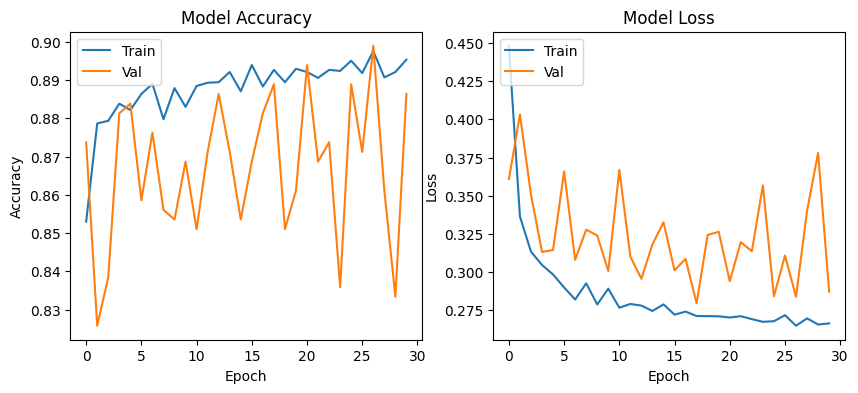

In [ ]:

import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_elmo_rnn.history['accuracy'])
plt.plot(history_elmo_rnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_elmo_rnn.history['loss'])
plt.plot(history_elmo_rnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                          | Value                                   | Part of Model or Process                  |
|-----------------------------------------|-----------------------------------------|------------------------------------------|
| `input_shape`                           | `(1, X_train.shape[1])`                 | RNN Model Input Layer                    |
| `units` in SimpleRNN layer              | `128`                                   | SimpleRNN Layer                          |
| `kernel_regularizer`                    | `regularizers.l2(0.001)`                | SimpleRNN Layer                          |
| `activation` function in `Dense` layer  | `sigmoid`                               | Output Dense Layer                       |
| `optimizer`                             | `adam`                                  | Model Compilation                        |
| `loss function`                         | `binary_crossentropy`                   | Model Compilation                        |
| `metrics`                               | `accuracy`                              | Model Compilation                        |
| `epochs`                                | `30`                                    | Model Training                           |
| `batch_size`                            | `32`                                    | Model Training                           |
| `validation_data`                       | `(X_val_reshaped, y_val)`               | Model Training                           |
| `ELMo Embedding`                        | `Used in input preparation, context-sensitive` |  dataset preparation |




## **ELMO LSTM**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

# Reshape X_train, X_val, and X_test to include timestep dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_shape = (1, X_train.shape[1])

# Create an RNN model with LSTM
inputs = Input(shape=input_shape)
lstm_layer = LSTM(128,kernel_regularizer=regularizers.l2(0.001))(inputs)  # Using LSTM instead of SimpleRNN
outputs = Dense(1, activation='sigmoid')(lstm_layer)
elmo_lstm_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
elmo_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
elmo_lstm_model.summary()
# Train the model
history_elmo_lstm= elmo_lstm_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Predict on the test data
# Predict on the test data
from sklearn.metrics import classification_report
y_pred_probs = elmo_lstm_model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1, 1024)]         0         
                                                                 
 lstm_6 (LSTM)               (None, 128)               590336    
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 590465 (2.25 MB)
Trainable params: 590465 (2.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
223/223 [==============================] - 7s 16ms/step - loss: 0.4755 - accuracy: 0.8398 - val_loss: 0.3567 - val_accuracy: 0.8561
Epoch 2/30
223/223 [==============================] - 3s 16ms/step - loss: 0.3304 - accuracy: 0.8774 - val_loss: 0.3433 - val_accuracy: 0.8763


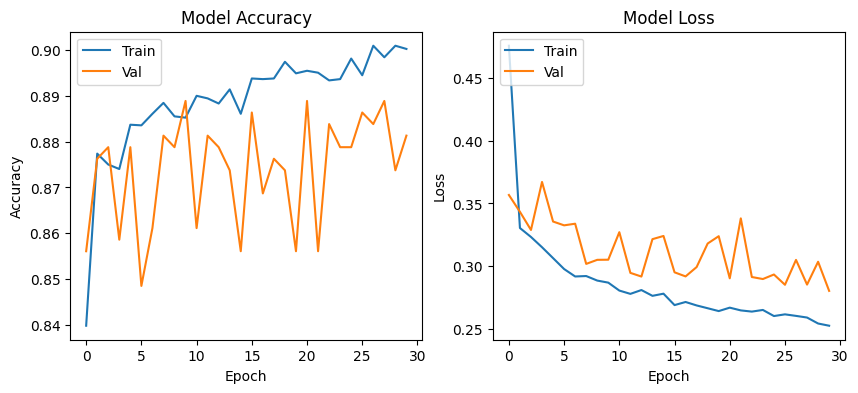

In [ ]:

import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_elmo_lstm.history['accuracy'])
plt.plot(history_elmo_lstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_elmo_lstm.history['loss'])
plt.plot(history_elmo_lstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                          | Value                                   | Part of Model or Process                  |
|-----------------------------------------|-----------------------------------------|------------------------------------------|
| `input_shape`                           | `(1, X_train.shape[1])`                 | LSTM Model Input Layer                   |
| `units` in LSTM layer                   | `128`                                   | LSTM Layer                               |
| `kernel_regularizer`                    | `regularizers.l2(0.001)`                | LSTM Layer                               |
| `activation` function in `Dense` layer  | `sigmoid`                               | Output Dense Layer                       |
| `optimizer`                             | `adam`                                  | Model Compilation                        |
| `loss function`                         | `binary_crossentropy`                   | Model Compilation                        |
| `metrics`                               | `accuracy`                              | Model Compilation                        |
| `epochs`                                | `30`                                    | Model Training                           |
| `batch_size`                            | `32`                                    | Model Training                           |
| `validation_data`                       | `(X_val_reshaped, y_val)`               | Model Training                           |
| `ELMo Embedding`                        | `Used in input preparation, context-sensitive` | dataset preparation |


## **ELMO GRU**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GRU, Dropout
from tensorflow.keras.models import Model

# Reshape X_train, X_val, and X_test to include timestep dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_shape = (1, X_train.shape[1])

# Create a model with a GRU layer
inputs = Input(shape=input_shape)
gru_layer = GRU(256, kernel_regularizer=regularizers.l2(0.001),return_sequences=True)(inputs)  # Adding return_sequences=True for stacking GRU layers
gru_layer = Dropout(0.2)(gru_layer)  # Dropout regularization after the first GRU layer
gru_layer = GRU(128)(gru_layer)  # Adding another GRU layer for better representation
gru_layer = Dropout(0.2)(gru_layer)  # Dropout regularization after the second GRU layer
outputs = Dense(1, activation='sigmoid')(gru_layer)
elmo_gru_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
elmo_gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check the structure
elmo_gru_model.summary()



Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 1, 1024)]         0         
                                                                 
 gru_8 (GRU)                 (None, 1, 256)            984576    
                                                                 
 dropout_2 (Dropout)         (None, 1, 256)            0         
                                                                 
 gru_9 (GRU)                 (None, 128)               148224    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1132929 (4.32 MB)
Trainable params: 1132929 

In [ ]:
# Train the model
history_elmo_gru = elmo_gru_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Predict on the test data
from sklearn.metrics import classification_report
y_pred_probs = elmo_gru_model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())

Epoch 1/10
223/223 [==============================] - 7s 17ms/step - loss: 0.4789 - accuracy: 0.8506 - val_loss: 0.4076 - val_accuracy: 0.8308
Epoch 2/10
223/223 [==============================] - 6s 26ms/step - loss: 0.3364 - accuracy: 0.8743 - val_loss: 0.3569 - val_accuracy: 0.8359
Epoch 3/10
223/223 [==============================] - 4s 16ms/step - loss: 0.3178 - accuracy: 0.8782 - val_loss: 0.3221 - val_accuracy: 0.8788
Epoch 4/10
223/223 [==============================] - 4s 16ms/step - loss: 0.3016 - accuracy: 0.8826 - val_loss: 0.2984 - val_accuracy: 0.8914
Epoch 5/10
223/223 [==============================] - 6s 26ms/step - loss: 0.2978 - accuracy: 0.8817 - val_loss: 0.3089 - val_accuracy: 0.8737
Epoch 6/10
223/223 [==============================] - 4s 16ms/step - loss: 0.2902 - accuracy: 0.8868 - val_loss: 0.3163 - val_accuracy: 0.8788
Epoch 7/10
223/223 [==============================] - 4s 16ms/step - loss: 0.2891 - accuracy: 0.8850 - val_loss: 0.3056 - val_accuracy: 0.8788

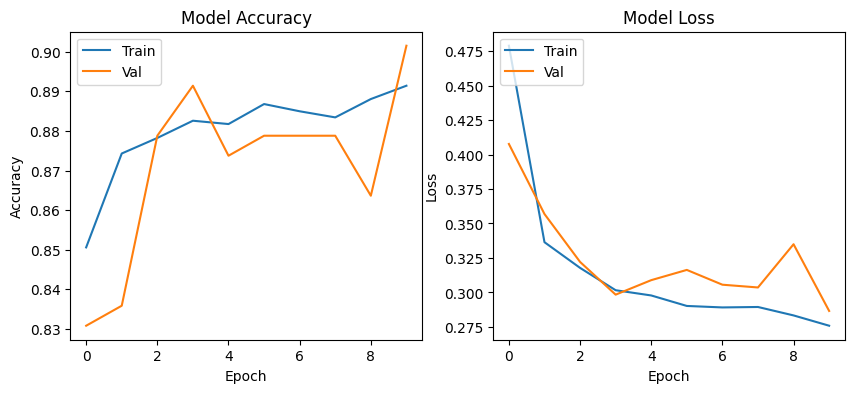

In [ ]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_elmo_gru.history['accuracy'])
plt.plot(history_elmo_gru.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_elmo_gru.history['loss'])
plt.plot(history_elmo_gru.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                          | Value                                   | Part of Model or Process                  |
|-----------------------------------------|-----------------------------------------|------------------------------------------|
| `input_shape`                           | `(1, X_train.shape[1])`                 | GRU Model Input Layer                    |
| `units` in first GRU layer              | `256`                                   | First GRU Layer                          |
| `kernel_regularizer` in first GRU layer | `regularizers.l2(0.001)`                | First GRU Layer                          |
| `return_sequences`                      | `True`                                  | First GRU Layer, to enable stacking      |
| `Dropout` after first GRU layer         | `0.2`                                   | Regularization between GRU layers        |
| `units` in second GRU layer             | `128`                                   | Second GRU Layer                         |
| `Dropout` after second GRU layer        | `0.2`                                   | Regularization post second GRU layer     |
| `activation` function in `Dense` layer  | `sigmoid`                               | Output Dense Layer                       |
| `optimizer`                             | `adam`                                  | Model Compilation                        |
| `loss function`                         | `binary_crossentropy`                   | Model Compilation                        |
| `metrics`                               | `accuracy`                              | Model Compilation                        |
| `epochs`                                | `10`                                    | Model Training                           |
| `batch_size`                            | `32`                                    | Model Training                           |
| `validation_data`                       | `(X_val_reshaped, y_val)`               | Model Training                           |
| `ELMo Embedding`                        | `Used in input preparation, context-sensitive` |  dataset preparation |



In [98]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Model

# Reshape X_train, X_val, and X_test to include timestep dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_shape = (1, X_train.shape[1])

# Create a model with a Bidirectional LSTM layer
inputs = Input(shape=input_shape)
bi_lstm_layer = Bidirectional(LSTM(128,kernel_regularizer=regularizers.l2(0.001)))(inputs)  # Wrap LSTM with Bidirectional
outputs = Dense(1, activation='sigmoid')(bi_lstm_layer)
elmo_bilstm_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
elmo_bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check the structure
elmo_bilstm_model.summary()


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1, 25)]           0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 256)               157696    
 onal)                                                           
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 157953 (617.00 KB)
Trainable params: 157953 (617.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history_elmo_bilstm = elmo_bilstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=16, validation_data=(X_val_reshaped, y_val))

# Predict on the test data
from sklearn.metrics import classification_report
y_pred_probs = elmo_bilstm_model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())

Epoch 1/10
446/446 [==============================] - 16s 29ms/step - loss: 0.4587 - accuracy: 0.8544 - val_loss: 0.3392 - val_accuracy: 0.8813
Epoch 2/10
446/446 [==============================] - 10s 23ms/step - loss: 0.3336 - accuracy: 0.8728 - val_loss: 0.3289 - val_accuracy: 0.8838
Epoch 3/10
446/446 [==============================] - 13s 28ms/step - loss: 0.3254 - accuracy: 0.8730 - val_loss: 0.3183 - val_accuracy: 0.8813
Epoch 4/10
446/446 [==============================] - 13s 29ms/step - loss: 0.3161 - accuracy: 0.8733 - val_loss: 0.3071 - val_accuracy: 0.8813
Epoch 5/10
446/446 [==============================] - 13s 30ms/step - loss: 0.3158 - accuracy: 0.8742 - val_loss: 0.3205 - val_accuracy: 0.8763
Epoch 6/10
446/446 [==============================] - 13s 30ms/step - loss: 0.3041 - accuracy: 0.8830 - val_loss: 0.3085 - val_accuracy: 0.8763
Epoch 7/10
446/446 [==============================] - 13s 29ms/step - loss: 0.2956 - accuracy: 0.8866 - val_loss: 0.3684 - val_accuracy:

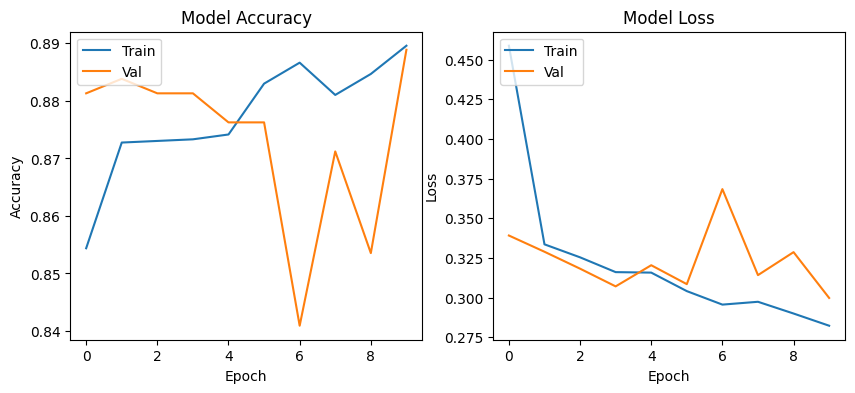

In [ ]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_elmo_bilstm.history['accuracy'])
plt.plot(history_elmo_bilstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_elmo_bilstm.history['loss'])
plt.plot(history_elmo_bilstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

| Hyperparameter                          | Value                                   | Part of Model or Process                  |
|-----------------------------------------|-----------------------------------------|------------------------------------------|
| `input_shape`                           | `(1, X_train.shape[1])`                 | BiLSTM Model Input Layer                 |
| `units` in BiLSTM layer                 | `128` (per direction, making 256 total) | Bidirectional LSTM Layer                 |
| `kernel_regularizer`                    | `regularizers.l2(0.001)`                | Bidirectional LSTM Layer                 |
| `activation` function in `Dense` layer  | `sigmoid`                               | Output Dense Layer                       |
| `optimizer`                             | `adam`                                  | Model Compilation                        |
| `loss function`                         | `binary_crossentropy`                   | Model Compilation                        |
| `metrics`                               | `accuracy`                              | Model Compilation                        |
| `epochs`                                | `10`                                    | Model Training                           |
| `ELMo Embedding`                        | `Used in input preparation, context-sensitive` |  dataset preparation |


## **Bert RNN**

In [51]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


data = pd.read_csv('processed_tweets.csv')
sentences = data['lemmatized_sentence'].tolist()

import numpy as np

# Function to generate BERT embeddings in batches
def bert_embeddings(sentences, batch_size=10):
    embeddings = []
    for i in range(0, len(sentences), batch_size):
        batch = sentences[i:i+batch_size]
        encoded_input = tokenizer(batch, padding=True, truncation=True, return_tensors='pt')
        with torch.no_grad():
            output = model(**encoded_input)
        batch_embeddings = output.last_hidden_state.mean(dim=1).numpy()
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

# Use the function to generate embeddings
embeddings = bert_embeddings(sentences)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [52]:
np.save('bert_embeddings.npy', embeddings)
import numpy as np
embeddings_loaded = np.load('bert_embeddings.npy')

embeddings_loaded

array([[ 0.06682717, -0.02238693,  0.43058136, ..., -0.29235503,
        -0.12323883, -0.18033575],
       [-0.10067867,  0.02960515,  0.5835181 , ..., -0.01951842,
        -0.0235762 ,  0.04084571],
       [-0.01743891, -0.2875139 ,  0.40424383, ..., -0.17213418,
        -0.14332198, -0.06354309],
       ...,
       [ 0.09040333, -0.214362  ,  0.72970605, ..., -0.20458698,
         0.02878364, -0.11538573],
       [ 0.12701985,  0.11572687,  0.6747662 , ..., -0.53326935,
         0.05544412, -0.18395905],
       [ 0.1067477 , -0.2404294 ,  0.44349757, ..., -0.10621796,
        -0.15376575, -0.23260681]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(embeddings_loaded, data['label'], test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model


# Reshape embeddings to include timestep dimension for RNN
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_shape = (1, X_train.shape[1])  # Updated to match BERT embedding size

# Create an RNN model
inputs = Input(shape=input_shape)
rnn_layer = SimpleRNN(128)(inputs)
outputs = Dense(1, activation='sigmoid')(rnn_layer)
model_rnn_bert = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_rnn_bert.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_rnn_bert.summary()


2024-05-03 03:06:15.295634: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-03 03:06:15.453040: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 03:06:16.266372: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-03 03:06:16.972461: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 768)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,945 (449.00 KB)

 Trainable params: 114,945 (449.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_rnn_bert = model_rnn_bert.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8393 - loss: 0.3570 - val_accuracy: 0.8838 - val_loss: 0.2530
Epoch 2/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8850 - loss: 0.2746 - val_accuracy: 0.8864 - val_loss: 0.2451
Epoch 3/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8910 - loss: 0.2545 - val_accuracy: 0.8965 - val_loss: 0.2426
Epoch 4/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8949 - loss: 0.2492 - val_accuracy: 0.9040 - val_loss: 0.2380
Epoch 5/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8990 - loss: 0.2450 - val_accuracy: 0.8939 - val_loss: 0.2314
Epoch 6/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8953 - loss: 0.2317 - val_accuracy: 0.8939 - val_loss: 0.2450
Epoch 7/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9012 - loss: 0.2197 - val_accuracy: 0.9040 - val_loss: 0.2301
Epoch 8/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9069 - loss: 0.2242 - val_accuracy: 0.

In [ ]:
# Predict on the test data
from sklearn.metrics import classification_report
y_pred_probs = model_rnn_bert.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score  support
Class 0        0.954861  0.932203  0.943396    295.0
Class 1        0.814815  0.871287  0.842105    101.0
macro avg      0.884838  0.901745  0.892751    396.0
weighted avg   0.919142  0.916667  0.917562    396.0


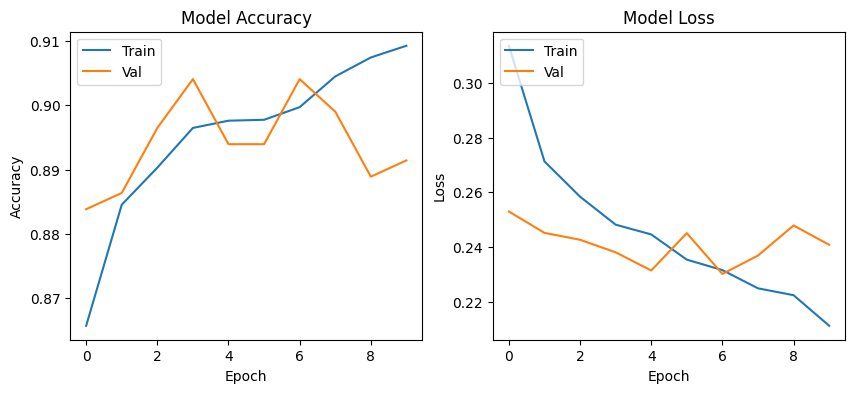

In [ ]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_rnn_bert.history['accuracy'])
plt.plot(history_rnn_bert.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_rnn_bert.history['loss'])
plt.plot(history_rnn_bert.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, f1_score

X = embeddings_loaded
y = data['label'].values

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape the data for LSTM input
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
inputs = Input(shape=input_shape)
x = LSTM(64, return_sequences=True)(inputs)
x = Dropout(0.5)(x)
x = LSTM(32)(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)
model_lstm_bert = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_lstm_bert.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model_lstm_bert.summary()

# Train the model
history_lstm_bert = model_lstm_bert.fit(X_train_reshaped, y_train, epochs=10, batch_size=16, validation_data=(X_val_reshaped, y_val))



Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 1, 768)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 1, 64)          │       213,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,697 (881.63 KB)

 Trainable params: 225,697 (881.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8157 - loss: 0.4124 - val_accuracy: 0.9066 - val_loss: 0.2485
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8778 - loss: 0.2794 - val_accuracy: 0.8977 - val_loss: 0.2434
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - loss: 0.2697 - val_accuracy: 0.9091 - val_loss: 0.2387
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8935 - loss: 0.2505 - val_accuracy: 0.9066 - val_loss: 0.2326
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8962 - loss: 0.2490 - val_accuracy: 0.9028 - val_loss: 0.2306
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8955 - loss: 0.2479 - val_accuracy: 0.9091 - val_loss: 0.2314
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9022 - loss: 0.2275 - val_accuracy: 0.9066 - val_loss: 0.2268
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8986 - loss: 0.2358 - val_accuracy: 0.

In [ ]:
# Predict on the test data
from sklearn.metrics import classification_report
y_pred_probs = model_rnn_bert.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
del report['accuracy']
print(pd.DataFrame(report).transpose())

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step
              precision    recall  f1-score  support
Class 0        0.942342  0.920775  0.931434    568.0
Class 1        0.810127  0.857143  0.832972    224.0
macro avg      0.876234  0.888959  0.882203    792.0
weighted avg   0.904948  0.902778  0.903586    792.0


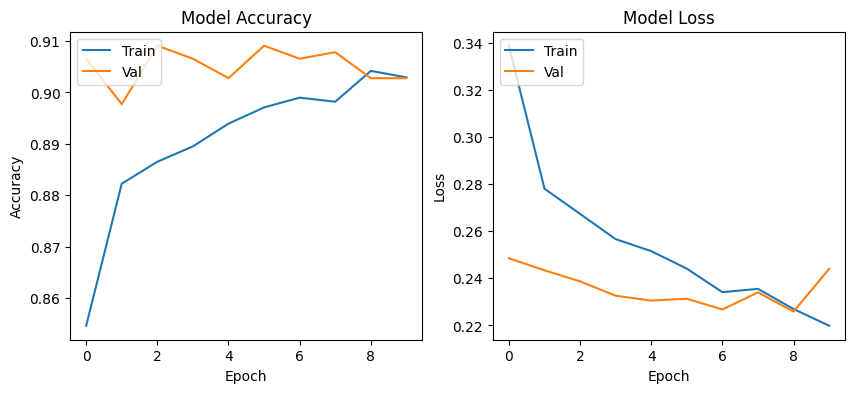

In [ ]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lstm_bert.history['accuracy'])
plt.plot(history_lstm_bert.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_lstm_bert.history['loss'])
plt.plot(history_lstm_bert.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

## **GRU BERT**

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 1, 768)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 1, 128)         │       344,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12 (GRU)                    │ (None, 1, 64)          │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_13 (GRU)                    │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395,841 (1.51 MB)

 Trainable params: 395,841 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7996 - loss: 0.4512 - val_accuracy: 0.8990 - val_loss: 0.2482
Epoch 2/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8919 - loss: 0.2646 - val_accuracy: 0.8990 - val_loss: 0.2380
Epoch 3/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8953 - loss: 0.2494 - val_accuracy: 0.9015 - val_loss: 0.2357
Epoch 4/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8942 - loss: 0.2516 - val_accuracy: 0.9015 - val_loss: 0.2598
Epoch 5/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8997 - loss: 0.2419 - val_accuracy: 0.9091 - val_loss: 0.2284
Epoch 6/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9046 - loss: 0.2238 - val_accuracy: 0.9040 - val_loss: 0.2283
Epoch 7/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9025 - loss: 0.2218 - val_accuracy: 0.9066 - val_loss: 0.2373
Epoch 8/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9034 - loss: 0.2224 - val_accuracy: 0.

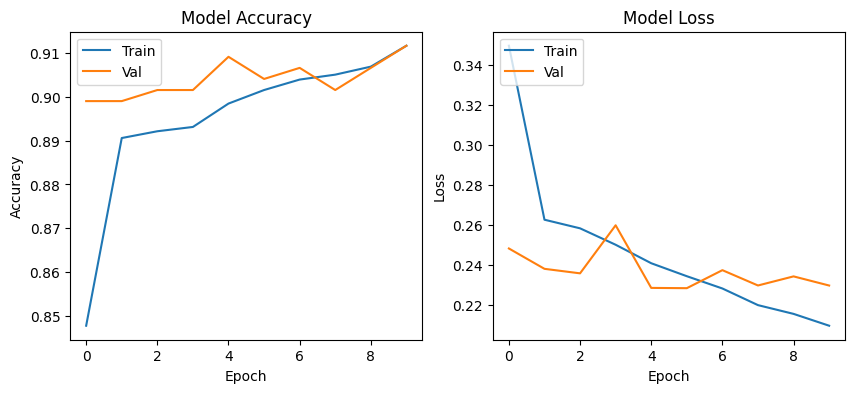

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Weighted Average F1 Score from Classification Report: 0.9197006681681454
              precision    recall  f1-score     support
Class 0        0.951890  0.938983  0.945392  295.000000
Class 1        0.828571  0.861386  0.844660  101.000000
accuracy       0.919192  0.919192  0.919192    0.919192
macro avg      0.890231  0.900185  0.895026  396.000000
weighted avg   0.920438  0.919192  0.919701  396.000000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split

# Split the embeddings and labels into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(embeddings_loaded, data['label'], test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape embeddings to include timestep dimension for RNN
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the GRU model with multiple layers
inputs = Input(shape=(1, X_train_reshaped.shape[2]))
x = GRU(128, return_sequences=True)(inputs)  # First GRU layer with return sequences
x = Dropout(0.2)(x)  # Dropout layer for regularization
x = GRU(64, return_sequences=True)(x)  # Second GRU layer with return sequences
x = Dropout(0.2)(x)  # Dropout layer for regularization
x = GRU(32)(x)  # Final GRU layer without return sequences
x = Dropout(0.2)(x)  # Dropout after last GRU layer
x = Dense(128, activation='relu')(x)  # Larger dense layer for more complex transformations
outputs = Dense(1, activation='sigmoid')(x)  # Output layer with sigmoid activation for binary classification
model_gru_bert = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_gru_bert.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check the architecture
model_gru_bert.summary()

# Train the model
history_gru_bert = model_gru_bert.fit(X_train_reshaped, y_train,
                    epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_gru_bert.history['accuracy'])
plt.plot(history_gru_bert.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_gru_bert.history['loss'])
plt.plot(history_gru_bert.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

# Evaluate the model
y_pred_probs = model_gru_bert.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

# Generate classification report with dictionary output
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
weighted_f1 = report['weighted avg']['f1-score']  # Extract the weighted average F1 score from the report
print("Weighted Average F1 Score from Classification Report:", weighted_f1)

# Optionally, print the entire classification report table
print(pd.DataFrame(report).transpose())


## **BILSTM BERT**

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 1, 768)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_18                │ (None, 1, 256)         │       918,528 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_19                │ (None, 1, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_20                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,132,545 (4.32 MB)

 Trainable params: 1,132,545 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7397 - loss: 0.6002 - val_accuracy: 0.8965 - val_loss: 0.3014
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8705 - loss: 0.3031 - val_accuracy: 0.8939 - val_loss: 0.2497
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8900 - loss: 0.2609 - val_accuracy: 0.9015 - val_loss: 0.2497
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8945 - loss: 0.2597 - val_accuracy: 0.9015 - val_loss: 0.2404
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8967 - loss: 0.2488 - val_accuracy: 0.9091 - val_loss: 0.2379
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8967 - loss: 0.2414 - val_accuracy: 0.9066 - val_loss: 0.2351
Epoch 7/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8964 - loss: 0.2363 - val_accuracy: 0.8990 - val_loss: 0.2314
Epoch 8/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9011 - loss: 0.2309 - val_accuracy: 0.9091 - va

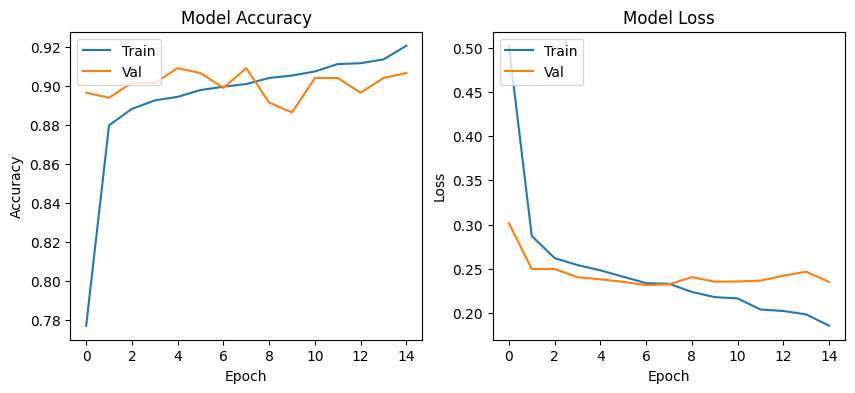

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Weighted Average F1 Score from Classification Report: 0.9239916052416052
              precision    recall  f1-score     support
Class 0        0.946128  0.952542  0.949324  295.000000
Class 1        0.858586  0.841584  0.850000  101.000000
accuracy       0.924242  0.924242  0.924242    0.924242
macro avg      0.902357  0.897063  0.899662  396.000000
weighted avg   0.923800  0.924242  0.923992  396.000000


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Split the embeddings and labels into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(embeddings_loaded, data['label'], test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape embeddings to include timestep dimension for RNN
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the Bidirectional LSTM model with multiple layers
inputs = Input(shape=(1, X_train_reshaped.shape[2]))
x = Bidirectional(LSTM(128, return_sequences=True))(inputs)  # Increased unit size for first LSTM layer
x = Dropout(0.2)(x)  # Slightly higher dropout to prevent overfitting
x = Bidirectional(LSTM(64, return_sequences=True))(x)  # Second LSTM layer with return sequences
x = Dropout(0.2)(x)  # Consistent dropout rate for regularization
x = Bidirectional(LSTM(32))(x)  # Final LSTM layer without return sequences
x = Dropout(0.2)(x)  # Dropout after last LSTM layer
x = Dense(128, activation='relu')(x)  # Larger dense layer for more complex transformations
outputs = Dense(1, activation='sigmoid')(x)  # Output layer with sigmoid activation for binary classification
model_bilstm_bert = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_bilstm_bert.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check the architecture
model_bilstm_bert.summary()


# Train the model with class weights
history_bilstm_bert = model_bilstm_bert.fit(X_train_reshaped, y_train,
                    epochs=15, batch_size=128, validation_data=(X_val_reshaped, y_val))


import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_bilstm_bert.history['accuracy'])
plt.plot(history_bilstm_bert.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history_bilstm_bert.history['loss'])
plt.plot(history_bilstm_bert.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()
# Evaluate the model
y_pred_probs = model_bilstm_bert.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)




# Generate classification report with dictionary output
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
weighted_f1 = report['weighted avg']['f1-score']  # Extract the weighted average F1 score from the report
print("Weighted Average F1 Score from Classification Report:", weighted_f1)

# Optionally, print the entire classification report table
print(pd.DataFrame(report).transpose())
